In [1]:
import numpy as np
import pandas as pd
from scipy.stats import mannwhitneyu
from scipy.stats import ttest_ind
from scipy.stats import bernoulli
from scipy.stats import median_test
from scipy.stats import chisquare
from scipy.stats import ks_2samp
from scipy.stats import chi2
from scipy.stats import percentileofscore
from scipy.stats import permutation_test
#from scipy.stats import chi2_contingency
#from statsmodels.stats.weightstats import ttest_ind as sm_ttest_ind
from statsmodels.stats.power import tt_ind_solve_power
from statsmodels.stats.proportion import proportion_confint
from scipy.stats  import gaussian_kde

from scipy.stats import bootstrap
from scipy.stats import shapiro

from scipy.stats import norm
import matplotlib.pyplot as plt
import seaborn as sns
from math import ceil

# Виды статистических критериев

**Статистические критерии** — это формальные правила или процедуры, позволяющие принять или отвергнуть нулевую гипотезу на основе наблюдаемых данных. Они определяют вероятность того, что полученные результаты могли возникнуть случайно, если нулевая гипотеза верна.

Формально статистический критерий — это функция от выборки (т.е. статистика), по значению которой принимается решение об отклонении или принятии нулевой гипотезы H0 при заданном уровне значимости $\alpha$

**Основные компоненты**:

|Компонент|	Описание|
|-----|-----|
|Нулевая гипотеза H0|Предположение, которое тестируется (например, "разницы нет")|
|Альтернативная гипотеза H1|Гипотеза, против которой проводится тестирование|
|Критическая область|Значения статистики, при которых H0 отвергается|
|Уровень значимости $\alpha$|Вероятность ошибки первого рода (отклонение H0, когда она верна)|
|Статистика критерия|Расчётная величина, сравниваемая с критическим значением или p-value|
|p-value|Вероятность получить столь же экстремальные данные при верной H0|
|Мощность теста $(1 - \beta)$|	Вероятность отклонить H0, когда она ложна (т.е. правильно принять H1)|

**Классификация статистических критериев**

|Тип критерия|Назначение|
|---|---|
|t-тест|Проверка разницы средних (при нормальности и/или большом размере выборки)|
|z-тест|Проверка среднего при известной дисперсии|
|U-критерий Манна–Уитни|Сравнение распределений (непараметрический)|
|Критерий знаков / Вилкоксона|Проверка сдвига в медиане (парные непараметрические тесты)|
|ANOVA / F-критерий|Проверка различий между несколькими средними|
|χ² (хи-квадрат) критерий|Сравнение категориальных распределений|
|Критерий отношения правдоподобия (LR)|Сравнение двух вложенных моделей или гипотез|
|Перестановочный тест|Проверка гипотез с помощью перестановок наблюдений|
|Бутстрап-оценки|Не критерий сам по себе, но может применяться для построения CI и оценки p-value|

Рассмотрим в кратце основные критерии, используемые в аналитике

## t-критерий Стьюдента

Это статистический тест, используемый для проверки того, является ли разница между наблюдениями двух групп статистически значимой или нет. Это любая проверка статистической гипотезы, при которой тестовая статистика соответствует t-распределению Стьюдента. Чаще всего он применяется, когда тестовая статистика подчинялась бы **нормальному распределению**, если бы было известно значение масштабирующего коэффициента в тестовой статистике (как правило, масштабирующий коэффициент неизвестен и поэтому является параметром, мешающим анализу). Когда масштабирующий коэффициент оценивается на основе данных, тестовая статистика — при определённых условиях — подчиняется t-распределению Стьюдента. Чаще всего t-критерий применяется для проверки того, значительно ли отличаются средние значения двух совокупностей. Во многих случаях Z-тест дает очень похожие результаты на t-тест, потому что последний приближается к первому по мере **увеличения размера набора данных**.

Рассмотрим разновидности t-критерия для **независимых выборок** (объекты в выборках не пересекаются)

\--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
### Равные размеры выборки и дисперсия

**Условия применения:**

- выборки независимы
- размеры выборок равны
- можно предположить, что дисперсия одинаковая

$$t = \frac{\bar{X}_1 - \bar{X}_2}{s_p \sqrt{\frac{2}{n}}},   s_p = \sqrt{\frac{s^2_{X_1}+s^2_{X_2}}{2}}, df = 2n-2, где$$

$s_p$ - объединенное стандартное отклонение

$n = n_1 = n_2$ - размер каждой выборки

$s^2_{X_1}, s^2_{X_2}$ - несмещенная оценка дисперсии всей популяции

$s_p\sqrt{\frac{2}{n}}$ - стандартная ошибка разности средних значений

\--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------


### Равные или неравные размеры выборок, схожие отклонения $1/2<\frac{s_{X_1}}
{s_{X_2}}<2$

Это частный случай предыдущего критерия

**Условия прмменения:**

- выборки незавимымы
- размеры выборок могут быть равны или <u>не равны</u>
- можно предположить, что дисперсия одинаковая

$$t = \frac{\bar{X}_1 - \bar{X}_2}{s_p \sqrt{\frac{1}{n_1}+\frac{1}{n_2}}},   s_p = \sqrt{\frac{(n_1-1)s^2_{X_1}+(n_2-1)s^2_{X_2}}{n_1+n_2-2}}, df = n_1+n_2-2, где$$

$s_p$ - объединенное стандартное отклонение, определенное таким образом, чтобы его квадрат был несмещенной оценкой общей дисперсии независимо от того, совпадают ли средние значения генеральной совокупности

$n_1, n_2$ - размер каждой выборки

\--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------


### Равные или неравные размеры выборок, неодинаковые отклонения $s_{X_1} > 2s_{X_2}$ или $s_{X_2} > 2s_{X_1}$

Этот критерий также называется Критерием Уэлча

**Условия прмменения:**

- выборки незавимымы

$$
t = \frac{\bar{X}_1 - \bar{X}_2}{\sqrt{\frac{S_1^2}{n_1} + \frac{S_2^2}{n_2}}}
$$

$$
df = \frac{\left( \frac{S_1^2}{n_1} + \frac{S_2^2}{n_2} \right)^2}{\frac{\left( \frac{S_1^2}{n_1} \right)^2}{n_1 - 1} + \frac{\left( \frac{S_2^2}{n_2} \right)^2}{n_2 - 1}}
$$

$s^2_{X_1}, s^2_{X_2}$ - несмещенные оценки дисперсии каждой выборки

Также существуют другие разновидности t-критерия - одновыборочный для сравнения выборочного среднего со средним в ГС, и критерий для парного теста для сравнения среднего в одной выборке до и после воздействия. Не будем их описывать здесь, т.к. для анализа результатов A/B - теста нас прежде всего интересуют описанные выше

In [ ]:
#from scipy.stats import ttest_ind

group1 = [23, 21, 25, 20, 22]
group2 = [30, 28, 27, 29, 26]

t_stat, p_value = ttest_ind(group1, group2, equal_var=True)
print(f"t-тест Стьюдента: t = {t_stat:.3f}, p = {p_value:.4f}")

t_stat, p_value = ttest_ind(group1, group2, equal_var=False)
print(f"t-тест Уэлча: t = {t_stat:.3f}, p = {p_value:.4f}")

t-тест Стьюдента: t = -5.209, p = 0.0008
t-тест Уэлча: t = -5.209, p = 0.0009


## Критерий Манна-Уитни (U-тест)

Это непараметрический статистический критерий нулевой гипотезы о том, что случайно выбранные значения из двух совокупностей имеют одинаковое распределение (H0).

Если дисперсии и формы распределения обеих выборок одинаковы - критерий показывает разницу медиан. В обратном случае он является «критерием согласия» и определяет, взяты ли распределения из одного распределения или из разных.

**Условия применения:**

- Все наблюдения обеих групп независимы друг от друга,
- Измерения являются как минимум порядковыми (то есть можно, по крайней мере, сказать, какое из двух наблюдений больше).

Чем меньше значение критерия, тем вероятнее, что различия между значениями параметра в выборках достоверны.

**Как посчитать U-статистику:**

1. Составить единый ранжированный ряд из обеих сопоставляемых выборок, расставив их элементы по степени нарастания признака и приписав меньшему значению меньший ранг (при наличии повторяющихся элементов в выборке использовать средний ранг). Общее количество рангов получится равным N = n1+n2
2. Разделить единый ранжированный ряд на два, состоящих соответственно из единиц первой и второй выборок. Подсчитать отдельно сумму рангов, приходящихся на долю элементов первой выборки R1, и отдельно — на долю элементов второй выборки R2, затем вычислить значения $U_1$ и $U_2$
3. Определить значение U-статистики Манна-Уитни по формуле $U =min(U1 ,U2)$
4. По таблице для избранного уровня статистической значимости определить критическое значение критерия для данных
5. При справедливости H0 гипотезы критерий имеет математическое ожидание $M(U)=(n_1*n_2)/2$ и дисперсию $D(U) = n_1n_2*(n_1+n_2+1)/12$ и при больших $n$ распределение стремится к нормальному.

$$U_1 = n_1 n_2 + \frac{n_1(n_1 + 1)}{2} - R_1, U_2 = n_1 n_2 + \frac{n_2(n_2 + 1)}{2} - R_2, где$$

${\displaystyle R_{1},R_{2}}$ это суммы рангов в группах 1 и 2 после ранжирования всех выборок из обеих групп таким образом, что наименьшее значение получает ранг 1, а наибольшее — ранг ${\displaystyle n_{1}+n_{2}}$

$n_1, n_2$ — размеры выборок.

In [ ]:
from scipy.stats import mannwhitneyu

group1 = [23, 21, 25, 20, 22]
group2 = [30, 28, 27, 29, 26]

u_stat, p_value = mannwhitneyu(group1, group2, alternative='two-sided')
print(f"U-тест Манна-Уитни: U = {u_stat:.3f}, p = {p_value:.4f}")

U-тест Манна-Уитни: U = 0.000, p = 0.0079


## Сравнение t-критерия и критерия Манна-Уитни

- t-критерий обеспечивает точную проверку равенства средних значений двух **нормальных совокупностей** с неизвестными, но равными дисперсиями. (t-тест Уэлча - это почти точный тест для случая, когда данные в норме, но отклонения могут отличаться)
- Для умеренно больших выборок и одностороннего теста t-критерий относительно устойчив к умеренным нарушениям предположения о нормальности.
- При достаточно больших выборках t-критерий асимптотически приближается к z-критерию и становится устойчивым даже к большим отклонениям от нормальности.
- Если данные существенно отличаются от нормальных и размер выборки невелик, t-тест может дать вводящие в заблуждение результаты.

- Если предположение о нормальности не выполняется, непараметрическая альтернатива t-тесту может иметь более высокую статистическую мощность.
- Однако, когда данные не являются нормальными и имеют разную дисперсию в разных группах, t-критерий может лучше контролировать ошибку первого рода, чем некоторые непараметрические альтернативы.
- Кроме того, непараметрические методы, такие как U-критерий Манна-Уитни, обычно не проверяют разницу в средних значениях, поэтому их следует использовать с осторожностью, если разница в средних значениях представляет основной интерес.

## Z-критерий

это любой статистический тест, для которого распределение статистики теста при нулевой гипотезе можно аппроксимировать нормальным распределением. Z-тест проверяет среднее значение распределения. Более удобный, чем t-критерий Стьюдента (критические значения которого определяются размером выборки), т.к. для каждого уровня значимости имеет единственное критическое значение

**Условия применения**

- статистическая оценка должна соответствовать нормальному распределению (такое допущение нам позволяет сделать ЦПТ)
- известна дисперсия генеральной совокупности или размер выборки велик (n>30) для ее оценки на основе выборочной дисперсии

$$Z = \frac{\bar{X} - \mu_0}{\sigma / \sqrt{n}}, где $$

$\bar{X}$ - выборочное среднее

$\mu_0$ - гипотетическое среднее ГС

$\frac{\sigma}{\sqrt{n}}$ - стандартная ошибка выборочного среднего $se$, при
$\sigma$ - известное стандартное отклонение ГС или выборочное стандартное отклонение при достаточно большом размере выборки (апроксимация на $\sigma$ ГС)
и $n$ - размер выборки

\--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

### Z-критерий для сравнения двух пропорций

Это статистический метод, используемый для оценки того, значительно ли отличается доля определённой характеристики в двух независимых выборках. Этот критерий использует свойство пропорций выборки (которое представляет собой среднее значение наблюдений, полученных из распределения Бернулли) быть асимптотически нормальными в соответствии с центральной предельной теоремой, что позволяет построить Z-критерий.

Z-статистика для сравнения двух пропорций:

$$Z={\frac {{\hat {p}}_{1}-{\hat {p}}_{2}}{\sqrt {{\hat {p}}(1-{\hat {p}})({\frac {1}{n_{1}}}+{\frac {1}{n_{2}}})}}}, где$$

$\hat{p_1}$ и $\hat{p_2}$ - доля первой и второй выборок

$n_1$ и $n_2$ - размер первой и второй выборок

${\displaystyle {\hat {p}}}$ = объединённая доля, рассчитываемая как
${\displaystyle {\hat {p}}={\frac {x_{1}+x_{2}}{n_{1}+n_{2}}}}$, где
${\displaystyle x_{1}}$ и ${\displaystyle x_{2}}$ — количество успешных результатов в двух выборках.

In [ ]:
import numpy as np
from statsmodels.stats.weightstats import ztest

# известна дисперсия ГС
data = np.array([100, 102, 98, 101, 99])
z_stat, p_value = ztest(data, value=100)
print(f"z-тест : Z = {z_stat:.3f}, p = {p_value:.4f}")

z-тест : Z = 0.000, p = 1.0000


## Тест Вилкоксона (Wilcoxon Signed-Rank Test)

Проверка сдвига медианы между двумя зависимыми выборками (например, до и после эксперимента). Оцениваются знаки и ранги разностей между парами.

**Условия применения:**
- Параметры связаны (парный эксперимент)
- Распределение может быть не нормальным
- Подходит при наличии выбросов


In [ ]:
from scipy.stats import wilcoxon

before = [5, 6, 7]
after = [6, 7, 8]

w_stat, p_value = wilcoxon(before, after)
print(f"Wilcoxon Signed-Rank test : W = {w_stat:.3f}, p = {p_value:.4f}")

Wilcoxon Signed-Rank test : W = 0.000, p = 0.2500


## Критерий Колмогорова–Смирнова (KS-тест)

Проверка, отличаются ли распределения двух выборок (или одной от теоретического).

Это непараметрический критерий равенства непрерывных одномерных распределений вероятностей. Его можно использовать для проверки того, соответствует ли выборка заданному эталонному распределению вероятностей (одновыборочный критерий К–С), или для проверки того, соответствуют ли две выборки одному и тому же распределению (двувыборочный критерий К–С).

**Условия применения:**
- Непрерывная шкала.
- Подходит при неизвестной форме распределения.
- Чувствителен к различиям в любом месте распределения.

$$D = \sup_x |F_1(x) - F_2(x)|, где$$

$ \sup_x$ - верхняя граница множества расстояний

$F_1(x), F_2(x)$ — эмпирические функции распределения.

In [ ]:
#Для сравнения с теоретическим распределением:

from scipy.stats import kstest

data = np.random.normal(0, 1, size=100)
ks_stat, p_value = kstest(data, 'norm')  # нормальность
print(f"KS test : KS = {ks_stat:.3f}, p = {p_value:.4f}")

KS test : KS = 0.069, p = 0.7000


In [ ]:
# Для сравнения двух выборок:

from scipy.stats import ks_2samp

sample1 = np.random.normal(0, 1, size=100)
sample2 = np.random.normal(0.5, 1, size=100)

ks_stat, p_value = ks_2samp(sample1, sample2)
print(f"KS test :KS = {ks_stat:.3f}, p = {p_value:.4f}")

KS test :KS = 0.360, p = 0.0000


## Перестановочный тест (Permutation Test)

Универсальный непараметрический тест для проверки различий между группами. H0 - все выборки взяты из одного распределения. Генерация всех (или многих) перестановок меток групп и сравнение статистики (например, разности средних) с наблюдаемой. Тесты перестановок существуют для любой меры, независимо от того, известно ли ее распределение

**Условия применения:**
- Минимальные требования к распределению.
- Часто применяется для средних или медиан.

In [ ]:
from scipy.stats import permutation_test

group1 = [23, 21, 25, 20, 22]
group2 = [30, 28, 27, 29, 26]

result = permutation_test((group1, group2), statistic=lambda x, y: np.mean(x) - np.mean(y),
                          permutation_type='independent', alternative='two-sided')

print(f"Permutation Test : разница средних = {result.statistic:.3f}, p = {result.pvalue:.4f} (среднее сначение в группе 1 = {np.array(group1).mean()}, среднее значение в группе 2 = {np.array(group2).mean()})")

Permutation Test : разница средних = -5.800, p = 0.0079 (среднее сначение в группе 1 = 22.2, среднее значение в группе 2 = 28.0)


Существует также множество других статистических критериев

# Сравнение критериев на А/А и А/B симуляциях


В ходе экспериментов могут возникать 2 вида ошибок - когда тест показывает изменение там, где его нет (ошибка I рода, FP), и когда тест отвергает наличие изменения там, где оно есть (ошибка II рода, FN). Ошибку первого рода мы контролируем на уровне каждого отдельного теста с помощью уровня значимости $\alpha$, передавая его непосредственно в функцию, используемую критерием. А вот ошибку II рода мы не можем контролировать напрямую - только обеспечивая необходимый размер выборки. Для ее оценки существует параметр $\beta$ - уровень ошибки II рода, и производный от него параметр power (или мощность) - доля случаев, когда тест покажет наличие изменений (опровергнет H0), в случае, когда изменения есть (верна H1)

Подробнее о взимосвязи $\alpha$, мощности, размера выборки, дисперсии разобрано в блокноте MDE. Однако сейчас, для иллюстрации того, какую роль в экспериментах играет правильно подорабранный критерий, нам также понадобятся симуляции и сравнение качества оценок на основе уровня значимости и мощности

**Cмысл симуляций в следующем**:
1. многократно насэмплируем выборок размера, необходимого с т.зр. MDE (tt_ind_solve_power) - а именно по 3 выборки на каждую итерацию, из которых одна выборка будет контрольная и 2 тестовые, причем в одной тестовой выборке будет заложен эффект, а в другой - нет.
2. Далее воспользуемся критерием для сравнения метрики в контрольной группе с метрикой в каждой из тестовых групп - соответственно в каждой итерации будет проведено 2 теста.
3. По итогам симуляции посчитаем долю случаев, когда критерий увидел изменения там, где их нет - $\alpha$, и долю случаев, когда критерий увидел изменения там, где они есть - power.

Поскольку мы сами закладываем эффект - мы владеем истинным знанием о том, где он есть и где нет. Такая роскошь может быть доступна только в симуляциях, когда мы мастерим собственную вселенную ╰( ͡° ͜ʖ ͡° )つ. Установим, что критерий подобран верно для такого рода данных в случае, когда полученная в ходе симуляции оценка $\alpha$ меньше 0.05, а power - больше 0.8

**Наметим план действий**:

- Рассмотрим класический t-test и тест Манна-Уитни на нормальном распределении
- покажем как получать $\alpha$ и $\beta$ и то что критерий работает
- "испортим" данные и посмотрим как ведут себя ошибки первого и второго рода
- рассмотрим вариант с нестандартной метрикой (квантиль) распределения или меру разброса

**Пример одного теста для каждой итерации**

Проведем симуляцию t-теста и проверим, что она работает правильно для A/B-эксперимента.

1. Зададим параметры распределения  - среднее значение, стандартное отклонение, $\alpha$ и $\beta$. Для одной из выборок увеличим среднее значение на 5%. Сформулируем HO: среднее значение в выборках отличается на 5%  
2. Рассчитаем необходимый минимальный размер для того, чтобы статистически значимо детектировать эффект и не потерять мощность теста $n = \frac{2\sigma^2(Z_{\alpha/2}+Z_{\beta})^2}{(\mu_t-\mu_c)^2}$

3. Сгенерируем 2 выборки из нормального распределения рассчитанного размера для заданных значений среднего и стандартного отклонения.
4. Рассчитаем t-критерий и оценим результат по значению p-value

При альфа 5% повторное проведение такой симуляции в 95% случаев должно опровергать H0.

Абсолютный размер ожидаемого эффекта = 5.0, cohen's d = 0.1, минимальный размер каждой выборки для детекции эффекта = 1570
Среднее значение в группе 1 = 101.28, 	std в группе 1 = 49.71
Среднее значение в группе 2 = 106.84, 	std в группе 2 = 49.63
Наблюдаемый эффект = 5.56, 	t-критерий = -3.14, 	p-value = 0.002


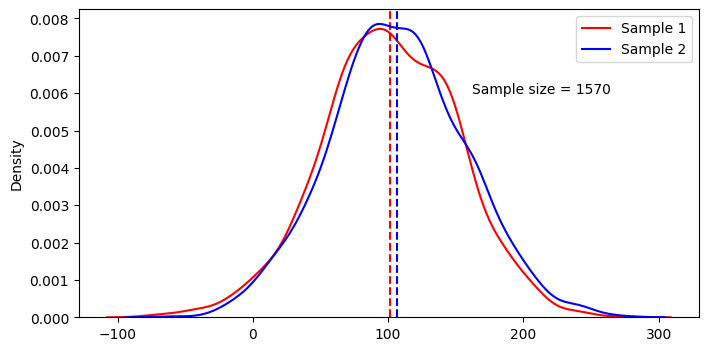

In [ ]:
# определим размер выборки и сгенерируем две выборки
alpha, beta, std, mean, power, lift = 0.05, 0.2, 50, 100, 1-beta, 0.05 # Хотим увидеть 5% изменение в метрику. Tоже самое что чувствительность MDE
effect_size = mean * lift / std  #cohens'd

# найдем размер выборки - не передаем значение nobs1
sample_size = int(tt_ind_solve_power(effect_size=effect_size, alpha=alpha, power=power, nobs1=None, ratio=1))
print(f"Абсолютный размер ожидаемого эффекта = {mean*lift}, cohen's d = {effect_size}, минимальный размер каждой выборки для детекции эффекта = {sample_size}")

# сгенерируем 2 выборки из нормального распределения, к одной добавим эффект
sample_1, sample_2 = np.random.normal(mean, std, sample_size), np.random.normal(mean*(1+lift), std, sample_size)

# отрисуем графики плотоности распределения по выборкам
plt.figure(figsize=(8,4))
sns.kdeplot(sample_1, color = 'red', label="Sample 1")
plt.axvline(sample_1.mean(), color = 'red', linestyle ='--')
sns.kdeplot(sample_2, color = 'blue', label="Sample 2")
plt.axvline(sample_2.mean(), color = 'blue', linestyle ='--')
plt.text(np.quantile(sample_1, 0.9), 0.006, 'Sample size = {}'.format(sample_size))
plt.legend()

print(f'Среднее значение в группе 1 = {sample_1.mean():.2f}, \tstd в группе 1 = {sample_1.std():.2f}')
print(f'Среднее значение в группе 2 = {sample_2.mean():.2f}, \tstd в группе 2 = {sample_2.std():.2f}')

# применим статистический критерий
t_stat, p_val = ttest_ind(sample_1, sample_2)
print(f'Наблюдаемый эффект = {sample_2.mean()-sample_1.mean():.2f}, \tt-критерий = {t_stat:.2f}, \tp-value = {p_val:.3f}')

**Вывод:** Все прекрасно в разовом тесте, мы получили то что хотели - тест отверг нулевую гипотезу. Посмотрим как справляется t-test в многократных тестах.

### Функция для построения графиков
В дальнейшем мы будем активно использовать эту визуализацию

In [2]:
def experiment_simulation_plot(alpha, aa_control_group_means, aa_test_group_means, aa_means_diffs_list, aa_stat_list, aa_p_val_list,
                               ab_control_group_means, ab_test_group_means, ab_means_diffs_list, ab_stat_list, ab_p_val_list):
    '''
    aa_control_group_means - средние полученные по симуляциям в контрольной группе в AA-варианте симуляции
    aa_test_group_means - средние полученные по симуляциям в тестовой группе в AA-варианте симуляции
    aa_means_diffs_list - разница средних в AA-варианте симуляции
    aa_stat_list - значение критерия полученного по симуляциям в AA-варианте симуляции
    aa_p_val_list - p-value  полученные по симуляциям в AA-варианте симуляции

    ab_control_group_means - средние полученные по симуляциям в контрольной группе в AB-варианте симуляции
    ab_test_group_means - средние полученные по симуляциям в тестовой группе в AB-варианте симуляции
    ab_means_diffs_list - разница средних в AB-варианте симуляции
    ab_stat_list - значение критерия полученного по симуляциям в AB-варианте симуляции
    ab_p_val_list - p-value  полученные по симуляциям в AB-варианте симуляции
    '''

    # рассчитываем 95% доверительные интервалы для полученных численно alpha  и  beta
    alpha_ci = proportion_confint(np.sum(np.array(aa_p_val_list) < alpha), n_iter, alpha=0.05)
    beta_ci = proportion_confint(np.sum(np.array(ab_p_val_list) < alpha), n_iter, alpha=0.05)

    # PLOT
    fig, axes = plt.subplots(2, 4, figsize=(18, 8))

    ### AA subplots
    ### Первый ряд графиков посвящен АА-симуляциям.
    # График распределения средних в первой и второй выборках. Иллюстрирует тоже самое о чем говорит ЦПТ.
    sns.kdeplot(ax=axes[0,0], data = aa_control_group_means, color = 'blue')
    sns.kdeplot(ax=axes[0,0], data = aa_test_group_means, color = 'red')
    axes[0,0].set_title('AA: распределение среднего')
    axes[0,0].axvline(x=np.quantile(aa_control_group_means, 0.5), linestyle = '--', color = 'blue', label = 'control mean')
    axes[0,0].axvline(x=np.quantile(aa_test_group_means, 0.5), linestyle = '--', color = 'red', label = 'test mean')
    axes[0,0].legend(loc='lower right')

    # График распределения разницы между средними
    sns.kdeplot(ax=axes[0,1], data = aa_means_diffs_list)
    axes[0,1].axvline(x=0, linestyle = '--', color = 'red', label = 'zero difference')
    axes[0,1].axvline(x=np.quantile(aa_means_diffs_list, alpha/2), linestyle = '--', color = 'grey', label = '95% conf interval for diff')
    axes[0,1].axvline(x=np.quantile(aa_means_diffs_list, 1-alpha/2), linestyle = '--', color = 'grey')
    axes[0,1].set_title('AA: Распределение разницы средних')
    axes[0,1].legend(loc='lower right')

    # график распределения значения стат критерия. t-статистика для t-теста
    sns.kdeplot(ax=axes[0,2], data = aa_stat_list)
    axes[0,2].set_title('AA: Распределение t-stat')

    # график распределения p-value
    sns.kdeplot(ax=axes[0,3], data = aa_p_val_list)
    axes[0,3].set_title('AA: Распределение p-value')
    axes[0,3].axvline(x=alpha, linestyle = '--', color = 'red', label = 'alpha')
    axes[0,3].axvline(x=np.quantile(aa_p_val_list, 0.8), linestyle = '--', color = 'blue', label = '80% quantile for p-value')
    axes[0,3].legend(loc='lower right')

    ### AB subplots
    ### второй ряд графиков посвящен АБ-симуляциям
    # график распределения средних в первой и второй выборках. Иллюстрирует тоже самое о чем говорит ЦПТ
    sns.kdeplot(ax=axes[1,0], data = ab_control_group_means, color = 'blue')
    sns.kdeplot(ax=axes[1,0], data = ab_test_group_means, color = 'red')
    axes[1,0].set_title('AB: Распределение среднего')
    axes[1,0].axvline(x=np.quantile(ab_control_group_means, 0.5), linestyle = '--', color = 'blue', label = 'control mean')
    axes[1,0].axvline(x=np.quantile(ab_test_group_means, 0.5), linestyle = '--', color = 'red', label = 'test mean')
    axes[1,0].legend(loc='lower right')

    # график распределения разницы между средними
    sns.kdeplot(ax=axes[1,1], data = ab_means_diffs_list)
    axes[1,1].axvline(x=0, linestyle = '--', color = 'red', label = 'zero difference')
    axes[1,1].axvline(x=np.quantile(ab_means_diffs_list, alpha/2), linestyle = '--', color = 'grey', label = '95% conf interval for diff')
    axes[1,1].axvline(x=np.quantile(ab_means_diffs_list, 1-alpha/2), linestyle = '--', color = 'grey')
    axes[1,1].set_title('AB: Распределение разницы средних')
    axes[1,1].legend(loc='lower right')

    # график распределения значения стат критерия. t-статистика для t-теста
    sns.kdeplot(ax=axes[1,2], data = ab_stat_list)
    axes[1,2].set_title('AB: Распределение t-stat')

    # график распределения p-value
    sns.kdeplot(ax=axes[1,3], data = ab_p_val_list)
    axes[1,3].set_title('AB: Распределение p-value')
    axes[1,3].axvline(x=alpha, linestyle = '--', color = 'red', label = 'alpha')
    axes[1,3].axvline(x=np.quantile(ab_p_val_list, 0.8), linestyle = '--', color = 'blue', label = '80% quantile for p-value')
    axes[1,3].legend(loc='lower right')

    # принтуем ключевые метрики
    print(f'\nМедиана эффекта для AA симуляции = {np.median(aa_means_diffs_list):.2f}, \tAlpha (FPR) = {(np.sum(np.array(aa_p_val_list) < alpha)/n_iter):.2f}, \tAlpha 95% CI: ({alpha_ci[0]:.2f}, {alpha_ci[1]:.2f})')
    print(f'Медиана эффекта для AB симуляции = {np.median(ab_means_diffs_list):.2f}, \tPower (TPR) = {(np.sum(np.array(ab_p_val_list) < alpha)/n_iter):.2f}, \tPower 95% CI: ({beta_ci[0]:.2f}, {beta_ci[1]:.2f})\n')

## Нормальные данные

### t-test

Абсолютный размер ожидаемого эффекта = 5.0, cohen's d = 0.1, минимальный размер каждой выборки для детекции эффекта = 1570, кол-во симуляций = 1000

Медиана эффекта для AA симуляции = 0.03, 	Alpha (FPR) = 0.06, 	Alpha 95% CI: (0.04, 0.07)
Медиана эффекта для AB симуляции = 4.94, 	Power (TPR) = 0.81, 	Power 95% CI: (0.78, 0.83)



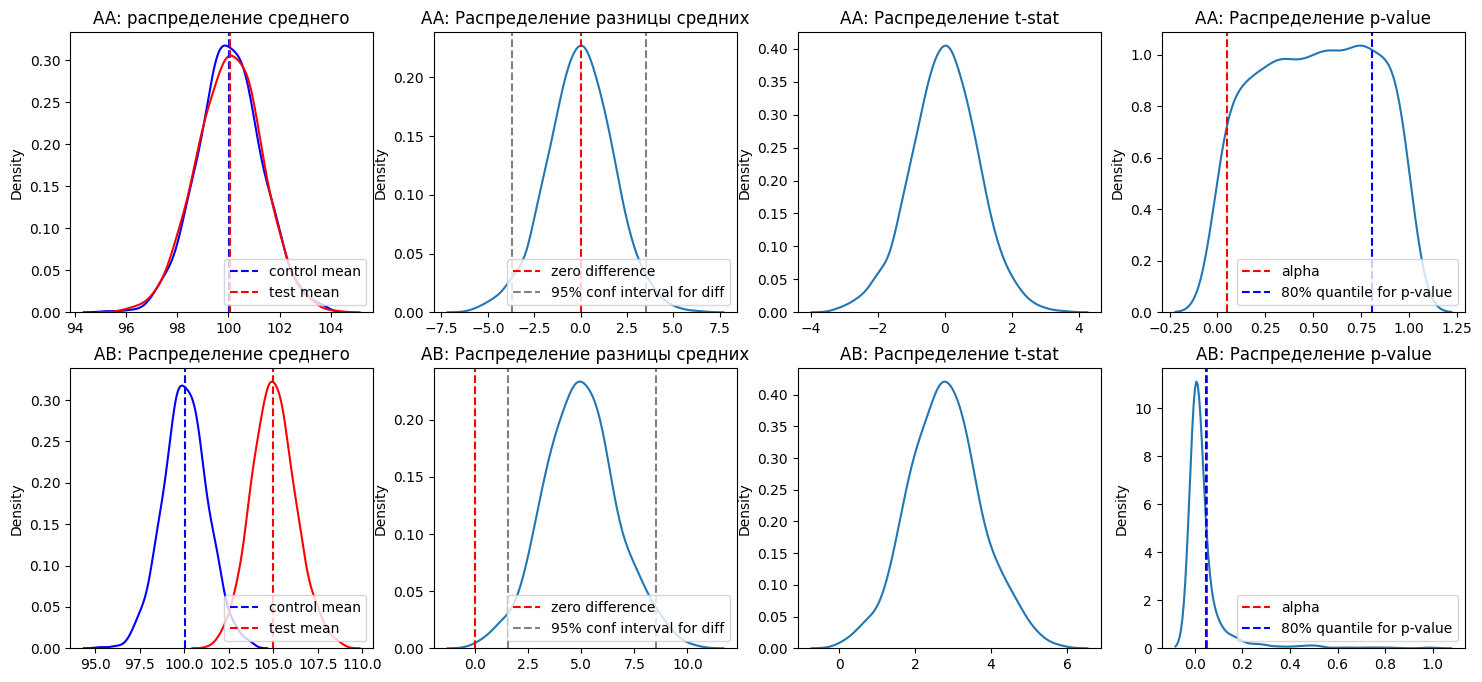

In [ ]:
# определим дизайн теста
alpha, beta, std, mean, rel_lift = 0.05, 0.2, 50, 100, 0.05
power, abs_lift, n_iter = 1-beta, mean*rel_lift, 1000
effect_size = abs_lift / std

# находим размер выборки
sample_size = int(tt_ind_solve_power(effect_size=effect_size, alpha=alpha, power=power, nobs1=None, ratio=1))
print(f"Абсолютный размер ожидаемого эффекта = {abs_lift}, cohen's d = {effect_size}, минимальный размер каждой выборки для детекции эффекта = {sample_size}, кол-во симуляций = {n_iter}")

# создаем пустые листы, которые будут заполняться нужными значениями по мере работы цикла
aa_control_group_means, aa_test_group_means = [], []
ab_control_group_means, ab_test_group_means = [], []

aa_p_val_list, aa_t_stat_list, aa_means_diffs_list = [], [], []
ab_p_val_list, ab_t_stat_list, ab_means_diffs_list = [], [], []

# запускаем цикл многократной проверки (n_iter раз) разницы средних между двумя нормальными рапределениями
for i in range(n_iter):
    # генерируем 3 выборки одну тестовую и две контрольных. При этом эффект добавляем только в одной контрольной
    sample_1 = np.random.normal(mean, std, sample_size)
    sample_2_zero_effect = np.random.normal(mean*(1+0), std, sample_size) # не добавляем эффект
    sample_2_with_effect = np.random.normal(mean*(1+rel_lift), std, sample_size) # добавляем эффект

    aa_control_group_means.append(sample_1.mean())
    aa_test_group_means.append(sample_2_zero_effect.mean())

    ab_control_group_means.append(sample_1.mean())
    ab_test_group_means.append(sample_2_with_effect.mean())

    aa_means_diff = sample_2_zero_effect.mean() - sample_1.mean()
    ab_means_diff = sample_2_with_effect.mean() - sample_1.mean()

    aa_t_stat, aa_p_val = ttest_ind(sample_2_zero_effect, sample_1)
    ab_t_stat, ab_p_val = ttest_ind(sample_2_with_effect, sample_1)

    aa_p_val_list.append(aa_p_val)
    ab_p_val_list.append(ab_p_val)

    aa_t_stat_list.append(aa_t_stat)
    ab_t_stat_list.append(ab_t_stat)

    aa_means_diffs_list.append(aa_means_diff)
    ab_means_diffs_list.append(ab_means_diff)

# рисуем график
experiment_simulation_plot(alpha = 0.05,
                           aa_control_group_means = aa_control_group_means,
                           aa_test_group_means = aa_test_group_means,
                           aa_means_diffs_list = aa_means_diffs_list,
                           aa_stat_list = aa_t_stat_list,
                           aa_p_val_list = aa_p_val_list,
                           ab_control_group_means = ab_control_group_means,
                           ab_test_group_means = ab_test_group_means,
                           ab_means_diffs_list = ab_means_diffs_list,
                           ab_stat_list = ab_t_stat_list,
                           ab_p_val_list = ab_p_val_list)

**Вывод:** на 1000 симмуляциях t-test справляется хорошо. Нужные альфа и бета выдерживаются. Критерий работает корректно.

### тест Манна-Уитни

Абсолютный размер ожидаемого эффекта = 5.0, cohen's d = 0.1, минимальный размер каждой выборки для детекции эффекта = 1570, кол-во симуляций = 1000

Медиана эффекта для AA симуляции = 0.04, 	Alpha (FPR) = 0.05, 	Alpha 95% CI: (0.04, 0.06)
Медиана эффекта для AB симуляции = 4.87, 	Power (TPR) = 0.76, 	Power 95% CI: (0.73, 0.78)



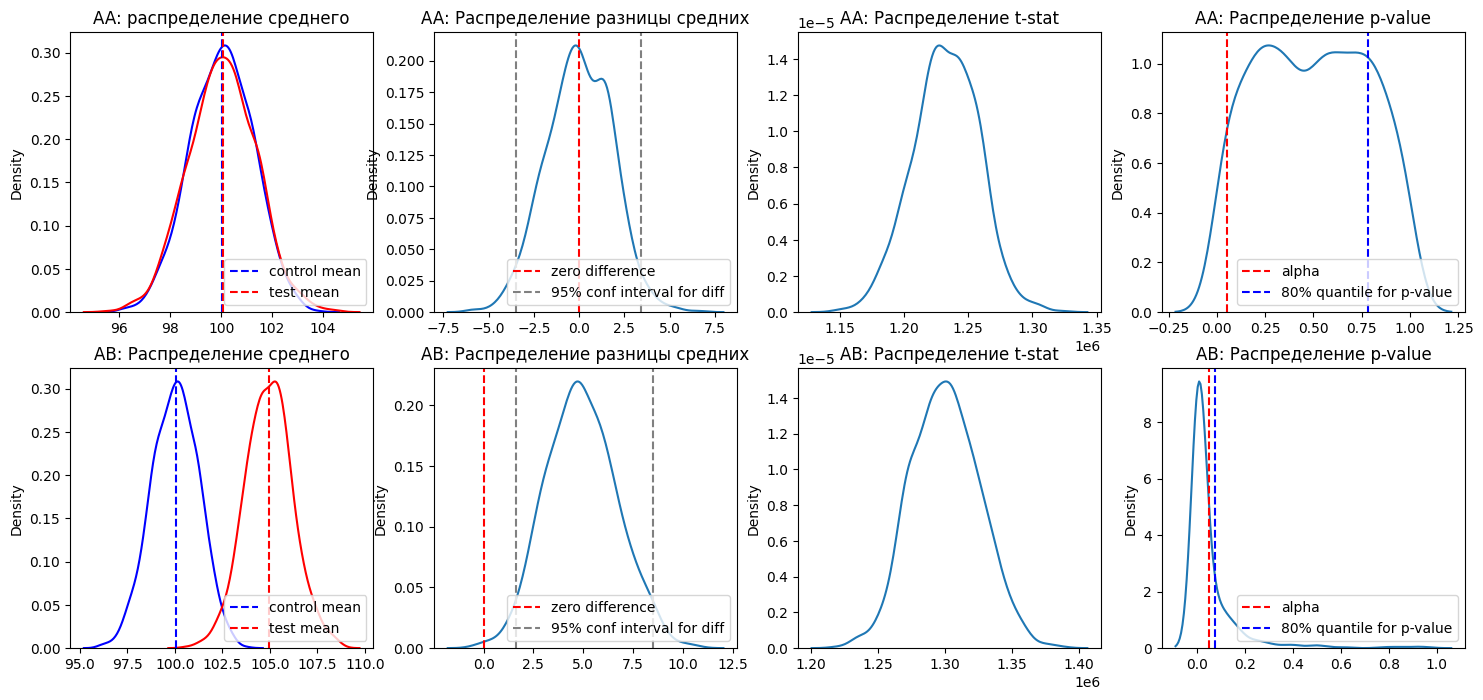

In [ ]:
# определим дизайн теста
alpha, beta, std, mean, rel_lift = 0.05, 0.2, 50, 100, 0.05
power, abs_lift, n_iter = 1-beta, mean*rel_lift, 1000
effect_size = abs_lift / std

# находим размер выборки
sample_size = int(tt_ind_solve_power(effect_size=effect_size, alpha=alpha, power=power, nobs1=None, ratio=1))
print(f"Абсолютный размер ожидаемого эффекта = {abs_lift}, cohen's d = {effect_size}, минимальный размер каждой выборки для детекции эффекта = {sample_size}, кол-во симуляций = {n_iter}")

# создаем пустые листы, которые будут заполняться нужными значениями по мере работы цикла
aa_control_group_means, aa_test_group_means = [], []
ab_control_group_means, ab_test_group_means = [], []

aa_p_val_list, aa_u_stat_list, aa_means_diffs_list = [], [], []
ab_p_val_list, ab_u_stat_list, ab_means_diffs_list = [], [], []

for i in range(n_iter):
    sample_1 = np.random.normal(mean, std, sample_size)
    sample_2_zero_effect = np.random.normal(mean*(1+0), std, sample_size)
    sample_2_with_effect = np.random.normal(mean*(1+rel_lift), std, sample_size)

    aa_control_group_means.append(sample_1.mean())
    aa_test_group_means.append(sample_2_zero_effect.mean())

    ab_control_group_means.append(sample_1.mean())
    ab_test_group_means.append(sample_2_with_effect.mean())

    aa_means_diff = sample_2_zero_effect.mean() - sample_1.mean()
    ab_means_diff = sample_2_with_effect.mean() - sample_1.mean()

    aa_u_stat, aa_p_val = mannwhitneyu(sample_2_zero_effect, sample_1)
    ab_u_stat, ab_p_val = mannwhitneyu(sample_2_with_effect, sample_1)

    aa_p_val_list.append(aa_p_val)
    ab_p_val_list.append(ab_p_val)

    aa_u_stat_list.append(aa_u_stat)
    ab_u_stat_list.append(ab_u_stat)

    aa_means_diffs_list.append(aa_means_diff)
    ab_means_diffs_list.append(ab_means_diff)

experiment_simulation_plot(alpha = 0.05,
                           aa_control_group_means = aa_control_group_means,
                           aa_test_group_means = aa_test_group_means,
                           aa_means_diffs_list = aa_means_diffs_list,
                           aa_stat_list = aa_u_stat_list,
                           aa_p_val_list = aa_p_val_list,
                           ab_control_group_means = ab_control_group_means,
                           ab_test_group_means = ab_test_group_means,
                           ab_means_diffs_list = ab_means_diffs_list,
                           ab_stat_list = ab_u_stat_list,
                           ab_p_val_list = ab_p_val_list)

**Вывод:** Как видим на нормальных данных тест Манна-Уитни справляется не хуже, чем t-test. Возможно только чуть подольше.

Посмотрим как работает t-test с рядом ухудшений
- выбросы
- разная дисперсия
- ненормальные исходные данные

## Данные с выбросами

### t-test

Абсолютный размер ожидаемого эффекта = 5.0, cohen's d = 0.1, минимальный размер каждой выборки для детекции эффекта = 1570, кол-во симуляций = 1000, кол-во выбросов = 10

Медиана эффекта для AA симуляции = 2.59, 	Alpha (FPR) = 0.25, 	Alpha 95% CI: (0.23, 0.28)
Медиана эффекта для AB симуляции = -2.40, 	Power (TPR) = 0.21, 	Power 95% CI: (0.19, 0.24)



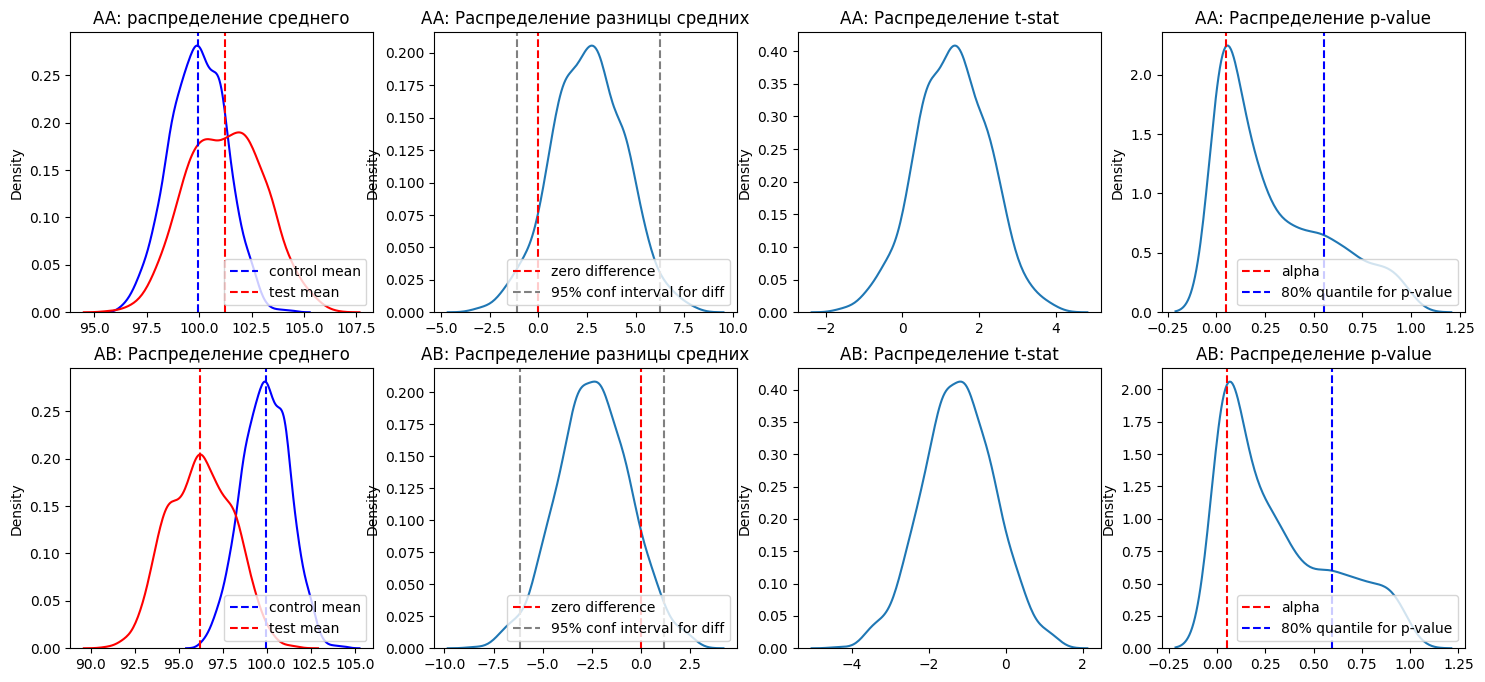

In [ ]:
# определим дизайн теста
alpha, beta, std, mean, rel_lift = 0.05, 0.2, 50, 100, 0.05
power, abs_lift, n_iter = 1-beta, mean*rel_lift, 1000
effect_size = abs_lift / std

# находим размер выборки
sample_size = int(tt_ind_solve_power(effect_size=effect_size, alpha=alpha, power=power, nobs1=None, ratio=1))

n_outliers = 10 # добавляем 10 наблюдений из другого распределения

print(f"Абсолютный размер ожидаемого эффекта = {abs_lift}, cohen's d = {effect_size}, минимальный размер каждой выборки для детекции эффекта = {sample_size}, кол-во симуляций = {n_iter}, кол-во выбросов = {n_outliers}")

# создаем пустые листы, которые будут заполняться нужными значениями по мере работы цикла
aa_control_group_means, aa_test_group_means = [], []
ab_control_group_means, ab_test_group_means = [], []

aa_p_val_list, aa_t_stat_list, aa_means_diffs_list = [], [], []
ab_p_val_list, ab_t_stat_list, ab_means_diffs_list = [], [], []

for i in range(n_iter):
    sample_1 = np.random.normal(mean, std, sample_size)
    sample_2_zero_effect = np.random.normal(mean*(1+0), std, sample_size-n_outliers)
    sample_2_with_effect = np.random.normal(mean*(1-rel_lift), std, sample_size-n_outliers)

    outliers = np.random.normal(5*mean, 3*std, size=n_outliers) # сгенерируем нужно количество выбросов из другого, аномального распределния

    sample_2_zero_effect_outliers = np.concatenate((sample_2_zero_effect, outliers), axis = None)
    sample_2_with_effect_outliers = np.concatenate((sample_2_with_effect, outliers), axis = None)

    aa_control_group_means.append(sample_1.mean())
    aa_test_group_means.append(sample_2_zero_effect_outliers.mean())
    ab_control_group_means.append(sample_1.mean())
    ab_test_group_means.append(sample_2_with_effect_outliers.mean())

    aa_means_diff = sample_2_zero_effect_outliers.mean() - sample_1.mean()
    ab_means_diff = sample_2_with_effect_outliers.mean() - sample_1.mean()

    aa_t_stat, aa_p_val = ttest_ind(sample_2_zero_effect_outliers, sample_1)
    ab_t_stat, ab_p_val = ttest_ind(sample_2_with_effect_outliers, sample_1)

    aa_p_val_list.append(aa_p_val)
    ab_p_val_list.append(ab_p_val)

    aa_t_stat_list.append(aa_t_stat)
    ab_t_stat_list.append(ab_t_stat)

    aa_means_diffs_list.append(aa_means_diff)
    ab_means_diffs_list.append(ab_means_diff)

    aa_control_group_means.append(sample_1.mean())
    aa_test_group_means.append(sample_2_zero_effect.mean())

    ab_control_group_means.append(sample_1.mean())
    ab_test_group_means.append(sample_2_with_effect.mean())

experiment_simulation_plot(alpha = 0.05,
                           aa_control_group_means = aa_control_group_means,
                           aa_test_group_means = aa_test_group_means,
                           aa_means_diffs_list = aa_means_diffs_list,
                           aa_stat_list = aa_t_stat_list,
                           aa_p_val_list = aa_p_val_list,
                           ab_control_group_means = ab_control_group_means,
                           ab_test_group_means = ab_test_group_means,
                           ab_means_diffs_list = ab_means_diffs_list,
                           ab_stat_list = ab_t_stat_list,
                           ab_p_val_list = ab_p_val_list)

**Вывод:** Как видно из симуляций добавление даже относительно небольшого кол-ва выбросов повышает ошибку первого рода в t-test

>Примечание 1: если rel_lift вычтен из среднего при генерации тестовой выборки, то мощность падает, т.к. эффект становится не сонаправлен с выбросами (как в сохраненном коде)

>Примечание 2: если наличие выбросов для нас стандартная ситуация при наблюдениях, то они будут учтены в std (в отличие от приведенного примера, когда std не учитывает выбросы). Тогда рассчет объема выборки учтет такой характер данных и потребует большего кол-ва наблюдений в выборку. Поэтому результаты теста будут получше, чем в этом примере. Но если выбросы прилетают неожиданно, тогда тест не даст правильных результатов

### тест Манна-Уитни

Абсолютный размер ожидаемого эффекта = 5.0, cohen's d = 0.1, минимальный размер каждой выборки для детекции эффекта = 1570, кол-во симуляций = 1000, кол-во выбросов = 10

Медиана эффекта для AA симуляции = 2.47, 	Alpha (FPR) = 0.05, 	Alpha 95% CI: (0.04, 0.06)
Медиана эффекта для AB симуляции = 7.48, 	Power (TPR) = 0.77, 	Power 95% CI: (0.74, 0.80)



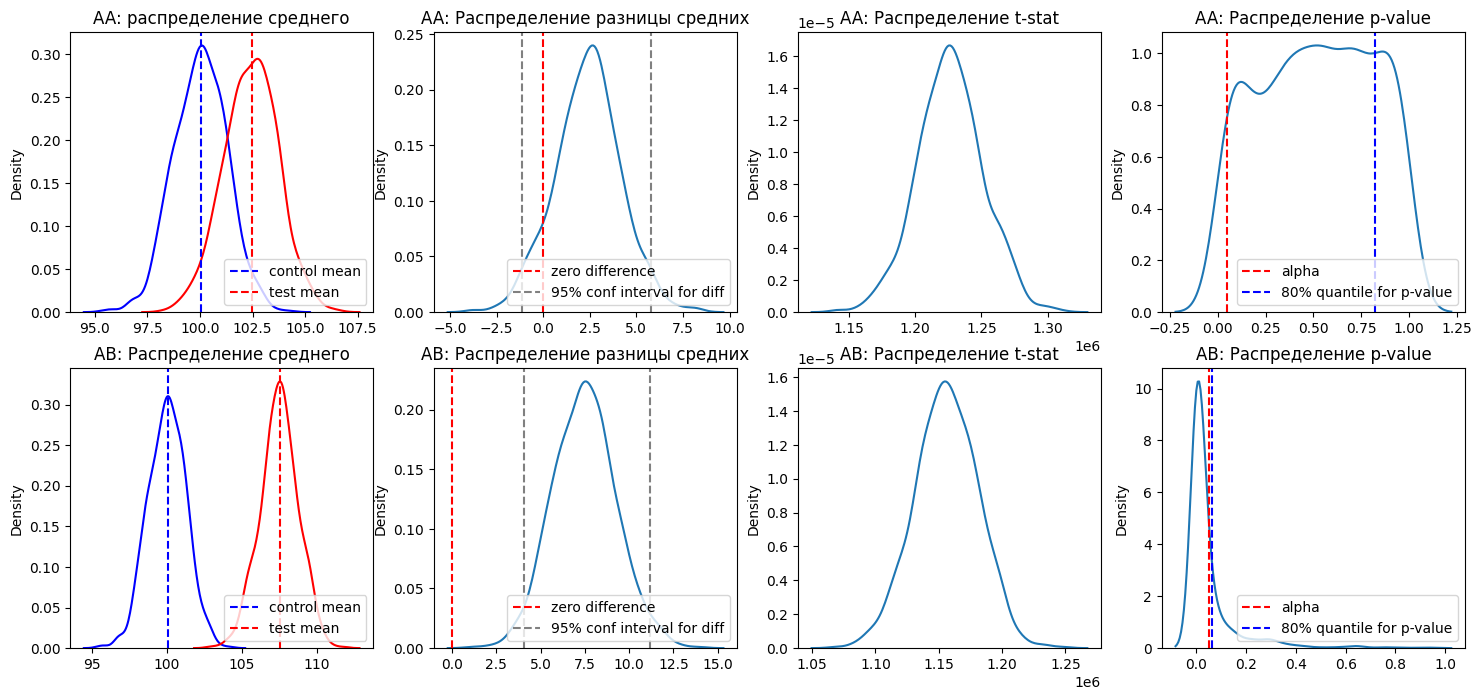

In [ ]:
# определим дизайн теста
alpha, beta, std, mean, rel_lift = 0.05, 0.2, 50, 100, 0.05
power, abs_lift, n_iter = 1-beta, mean*rel_lift, 1000
effect_size = abs_lift / std

# находим размер выборки
sample_size = int(tt_ind_solve_power(effect_size=effect_size, alpha=alpha, power=power, nobs1=None, ratio=1))

n_outliers = 10 # добавляем 10 наблюдений из другого распределения

print(f"Абсолютный размер ожидаемого эффекта = {abs_lift}, cohen's d = {effect_size}, минимальный размер каждой выборки для детекции эффекта = {sample_size}, кол-во симуляций = {n_iter}, кол-во выбросов = {n_outliers}")

# создаем пустые листы, которые будут заполняться нужными значениями по мере работы цикла
aa_control_group_means, aa_test_group_means = [], []
ab_control_group_means, ab_test_group_means = [], []

aa_p_val_list, aa_u_stat_list, aa_means_diffs_list = [], [], []
ab_p_val_list, ab_u_stat_list, ab_means_diffs_list = [], [], []

for i in range(n_iter):
    sample_1 = np.random.normal(mean, std, sample_size)
    sample_2_zero_effect = np.random.normal(mean*(1+0), std, sample_size-n_outliers)
    sample_2_with_effect = np.random.normal(mean*(1+rel_lift), std, sample_size-n_outliers)

    outliers = np.random.normal(5*mean, 3*std, size=n_outliers)

    sample_2_zero_effect_outliers = np.concatenate((sample_2_zero_effect, outliers), axis = None)
    sample_2_with_effect_outliers = np.concatenate((sample_2_with_effect, outliers), axis = None)

    aa_control_group_means.append(sample_1.mean())
    aa_test_group_means.append(sample_2_zero_effect_outliers.mean())
    ab_control_group_means.append(sample_1.mean())
    ab_test_group_means.append(sample_2_with_effect_outliers.mean())

    aa_means_diff = sample_2_zero_effect_outliers.mean() - sample_1.mean()
    ab_means_diff = sample_2_with_effect_outliers.mean() - sample_1.mean()

    aa_u_stat, aa_p_val = mannwhitneyu(sample_1, sample_2_zero_effect)
    ab_u_stat, ab_p_val = mannwhitneyu(sample_1, sample_2_with_effect)

    aa_p_val_list.append(aa_p_val)
    ab_p_val_list.append(ab_p_val)

    aa_u_stat_list.append(aa_u_stat)
    ab_u_stat_list.append(ab_u_stat)

    aa_means_diffs_list.append(aa_means_diff)
    ab_means_diffs_list.append(ab_means_diff)


experiment_simulation_plot(alpha = 0.05,
                           aa_control_group_means = aa_control_group_means,
                           aa_test_group_means = aa_test_group_means,
                           aa_means_diffs_list = aa_means_diffs_list,
                           aa_stat_list = aa_u_stat_list,
                           aa_p_val_list = aa_p_val_list,
                           ab_control_group_means = ab_control_group_means,
                           ab_test_group_means = ab_test_group_means,
                           ab_means_diffs_list = ab_means_diffs_list,
                           ab_stat_list = ab_u_stat_list,
                           ab_p_val_list = ab_p_val_list)

**Вывод:** Действительно критерий Манна-Уитни устойчив к появлению выбросов в выборке. И смог вернуться к целевым значениям ошибки первого рода. Это происходит из-за того, что критерий переводит оцениваемую величину в ранговое пространство значений. И там влияние выбросов значительно ослабевает.

## НЕ нормальное распределение

### t-test

Часто можно слышать, что t-test не предназначен для работы с НЕнормальными распределением. Проверим это на практике. Рассмотрим экспоненциальное распределение.

Абсолютный размер ожидаемого эффекта = 5.0, cohen's d = 0.05, минимальный размер каждой выборки для детекции эффекта = 6280, кол-во симуляций = 1000

Медиана эффекта для AA симуляции = 0.07, 	Alpha (FPR) = 0.03, 	Alpha 95% CI: (0.02, 0.05)
Медиана эффекта для AB симуляции = 4.93, 	Power (TPR) = 0.76, 	Power 95% CI: (0.74, 0.79)



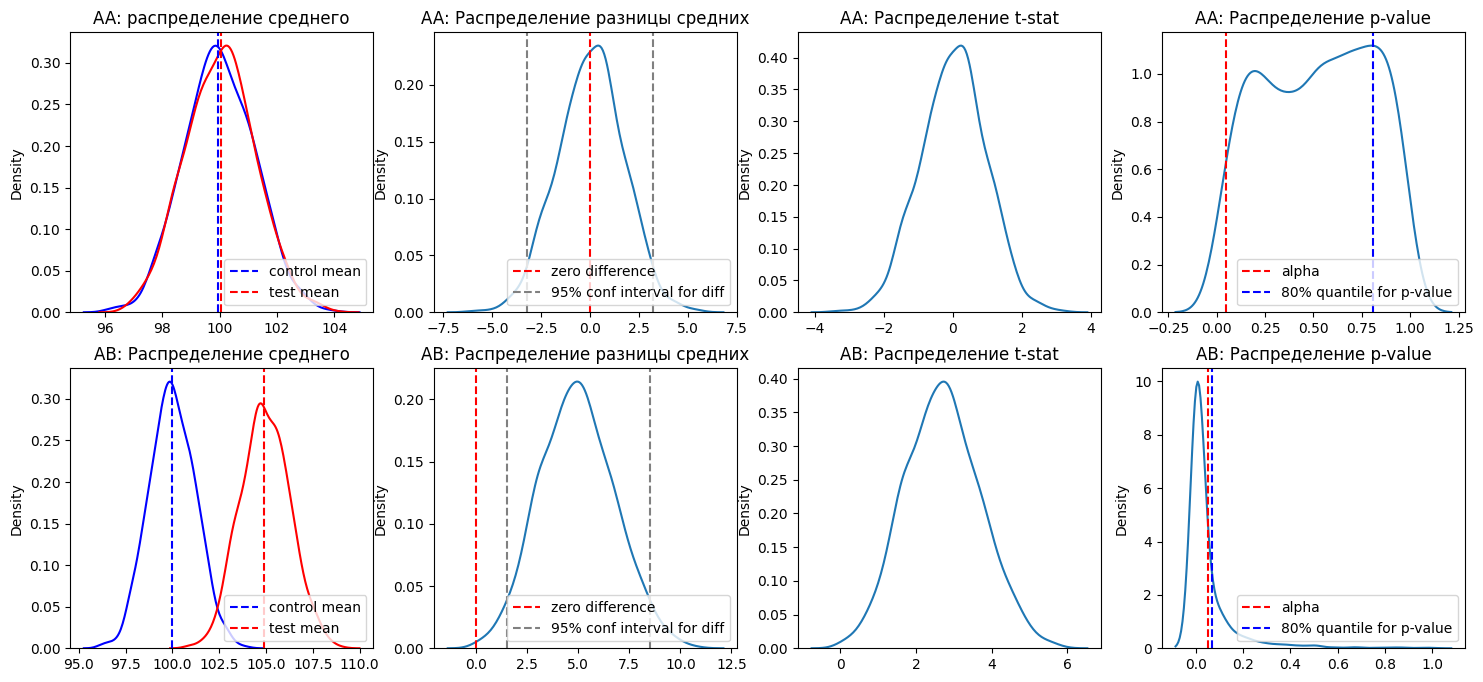

In [ ]:
# определим дизайн теста
alpha, beta, sigma_1, rel_lift = 0.05, 0.2, 100, 0.05
power, abs_lift, n_iter = 1-beta, sigma_1*rel_lift, 1000
effect_size = abs_lift / sigma_1

# находим размер выборки
sample_size = int(tt_ind_solve_power(effect_size=effect_size, alpha=alpha, power=power, nobs1=None, ratio=1))

print(f"Абсолютный размер ожидаемого эффекта = {abs_lift}, cohen's d = {effect_size}, минимальный размер каждой выборки для детекции эффекта = {sample_size}, кол-во симуляций = {n_iter}")

# создаем пустые листы, которые будут заполняться нужными значениями по мере работы цикла
aa_control_group_means, aa_test_group_means = [], []
ab_control_group_means, ab_test_group_means = [], []

aa_p_val_list, aa_t_stat_list, aa_means_diffs_list = [], [], []
ab_p_val_list, ab_t_stat_list, ab_means_diffs_list = [], [], []

for i in range(n_iter):
    sample_1 = np.random.exponential(scale= sigma_1, size=sample_size)
    sample_2_zero_effect = np.random.exponential(scale= sigma_1+0, size=sample_size)
    sample_2_with_effect = np.random.exponential(scale= sigma_1+sigma_1*rel_lift, size=sample_size)

    aa_control_group_means.append(sample_1.mean())
    aa_test_group_means.append(sample_2_zero_effect.mean())
    ab_control_group_means.append(sample_1.mean())
    ab_test_group_means.append(sample_2_with_effect.mean())

    aa_means_diff = sample_2_zero_effect.mean() - sample_1.mean()
    ab_means_diff = sample_2_with_effect.mean() - sample_1.mean()

    aa_t_stat, aa_p_val = ttest_ind(sample_2_zero_effect, sample_1)
    ab_t_stat, ab_p_val = ttest_ind(sample_2_with_effect, sample_1)

    aa_p_val_list.append(aa_p_val)
    ab_p_val_list.append(ab_p_val)

    aa_t_stat_list.append(aa_t_stat)
    ab_t_stat_list.append(ab_t_stat)

    aa_means_diffs_list.append(aa_means_diff)
    ab_means_diffs_list.append(ab_means_diff)

experiment_simulation_plot(alpha = 0.05,
                           aa_control_group_means = aa_control_group_means,
                           aa_test_group_means = aa_test_group_means,
                           aa_means_diffs_list = aa_means_diffs_list,
                           aa_stat_list = aa_t_stat_list,
                           aa_p_val_list = aa_p_val_list,
                           ab_control_group_means = ab_control_group_means,
                           ab_test_group_means = ab_test_group_means,
                           ab_means_diffs_list = ab_means_diffs_list,
                           ab_stat_list = ab_t_stat_list,
                           ab_p_val_list = ab_p_val_list)

**Вывод:** t-test вполне себе прилично справился с ненормальным распределением, хотя потребовались большие размеры выборок

### тест Манна-Уитни

Абсолютный размер ожидаемого эффекта = 5.0, cohen's d = 0.05, минимальный размер каждой выборки для детекции эффекта = 6280, кол-во симуляций = 1000

Медиана эффекта для AA симуляции = 0.10, 	Alpha (FPR) = 0.06, 	Alpha 95% CI: (0.05, 0.08)
Медиана эффекта для AB симуляции = 5.03, 	Power (TPR) = 0.66, 	Power 95% CI: (0.63, 0.69)



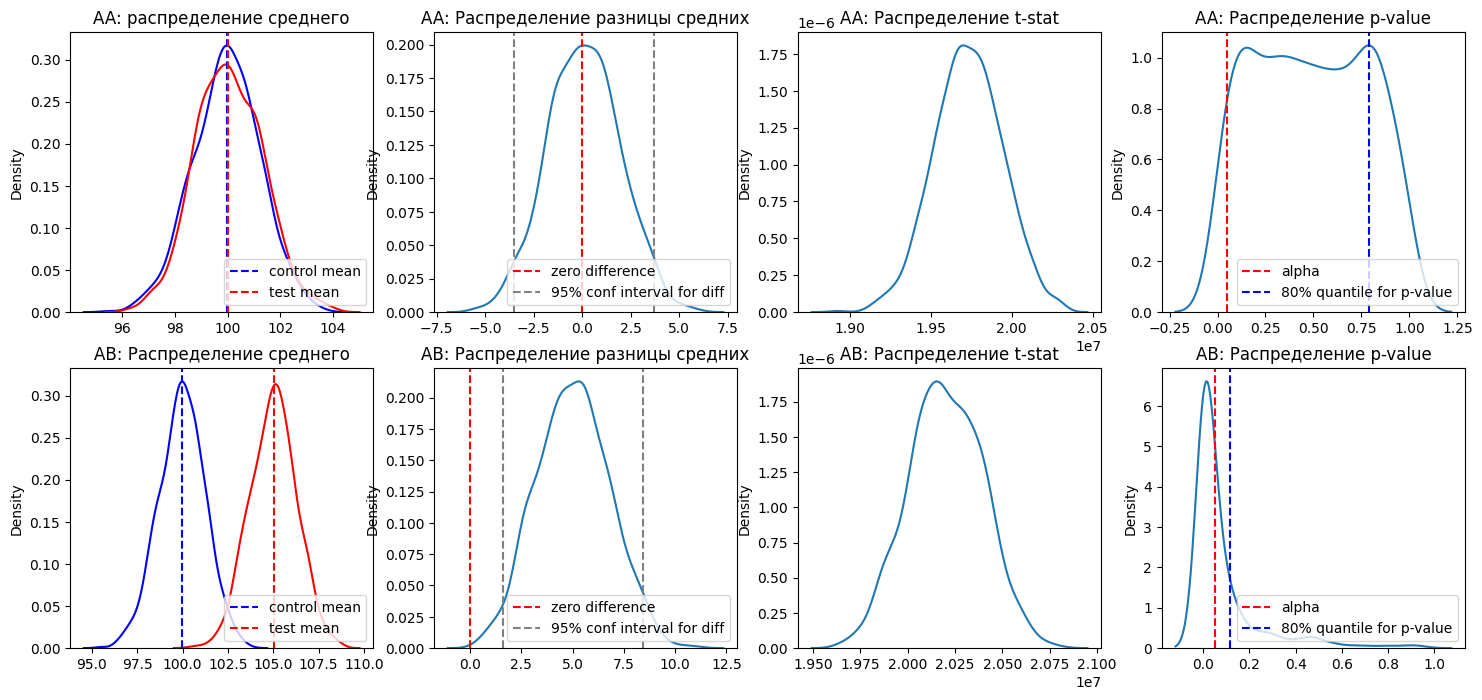

In [ ]:
# определим дизайн теста
alpha, beta, sigma_1, rel_lift = 0.05, 0.2, 100, 0.05
power, abs_lift, n_iter = 1-beta, sigma_1*rel_lift, 1000
effect_size = abs_lift / sigma_1

# находим размер выборки
sample_size = int(tt_ind_solve_power(effect_size=effect_size, alpha=alpha, power=power, nobs1=None, ratio=1))

print(f"Абсолютный размер ожидаемого эффекта = {abs_lift}, cohen's d = {effect_size}, минимальный размер каждой выборки для детекции эффекта = {sample_size}, кол-во симуляций = {n_iter}")

# создаем пустые листы, которые будут заполняться нужными значениями по мере работы цикла
aa_control_group_means, aa_test_group_means = [], []
ab_control_group_means, ab_test_group_means = [], []

aa_p_val_list, aa_u_stat_list, aa_means_diffs_list = [], [], []
ab_p_val_list, ab_u_stat_list, ab_means_diffs_list = [], [], []

for i in range(n_iter):
    # создаем выборки
    sample_1 = np.random.exponential(scale= sigma_1, size=sample_size)
    sample_2_zero_effect = np.random.exponential(scale= sigma_1+0, size=sample_size)
    sample_2_with_effect = np.random.exponential(scale= sigma_1+sigma_1*rel_lift, size=sample_size)

    # рассчитываем нужные метрики
    aa_control_group_means.append(sample_1.mean())
    aa_test_group_means.append(sample_2_zero_effect.mean())
    ab_control_group_means.append(sample_1.mean())
    ab_test_group_means.append(sample_2_with_effect.mean())

    aa_means_diff = sample_2_zero_effect.mean() - sample_1.mean()
    ab_means_diff = sample_2_with_effect.mean() - sample_1.mean()

    aa_u_stat, aa_p_val = mannwhitneyu(sample_2_zero_effect, sample_1)
    ab_u_stat, ab_p_val = mannwhitneyu(sample_2_with_effect, sample_1)

    aa_p_val_list.append(aa_p_val)
    ab_p_val_list.append(ab_p_val)

    aa_u_stat_list.append(aa_u_stat)
    ab_u_stat_list.append(ab_u_stat)

    aa_means_diffs_list.append(aa_means_diff)
    ab_means_diffs_list.append(ab_means_diff)

experiment_simulation_plot(alpha = 0.05,
                           aa_control_group_means = aa_control_group_means,
                           aa_test_group_means = aa_test_group_means,
                           aa_means_diffs_list = aa_means_diffs_list,
                           aa_stat_list = aa_u_stat_list,
                           aa_p_val_list = aa_p_val_list,
                           ab_control_group_means = ab_control_group_means,
                           ab_test_group_means = ab_test_group_means,
                           ab_means_diffs_list = ab_means_diffs_list,
                           ab_stat_list = ab_u_stat_list,
                           ab_p_val_list = ab_p_val_list)

**Вывод:** Критерий Манна-Уитни тоже вполне справляется с экспоненциальным распределением, но мощность при этом пострадала. По результатам 1000 симуляций 95% доверительный интервал для мощности составляет от 0,63 до 0,69. Тест Манна-Уитни не так хорошо умеет находить разницу в рангах, поэтому экспотенциальное распределение не такое удобное для работы в ранговом пространстве

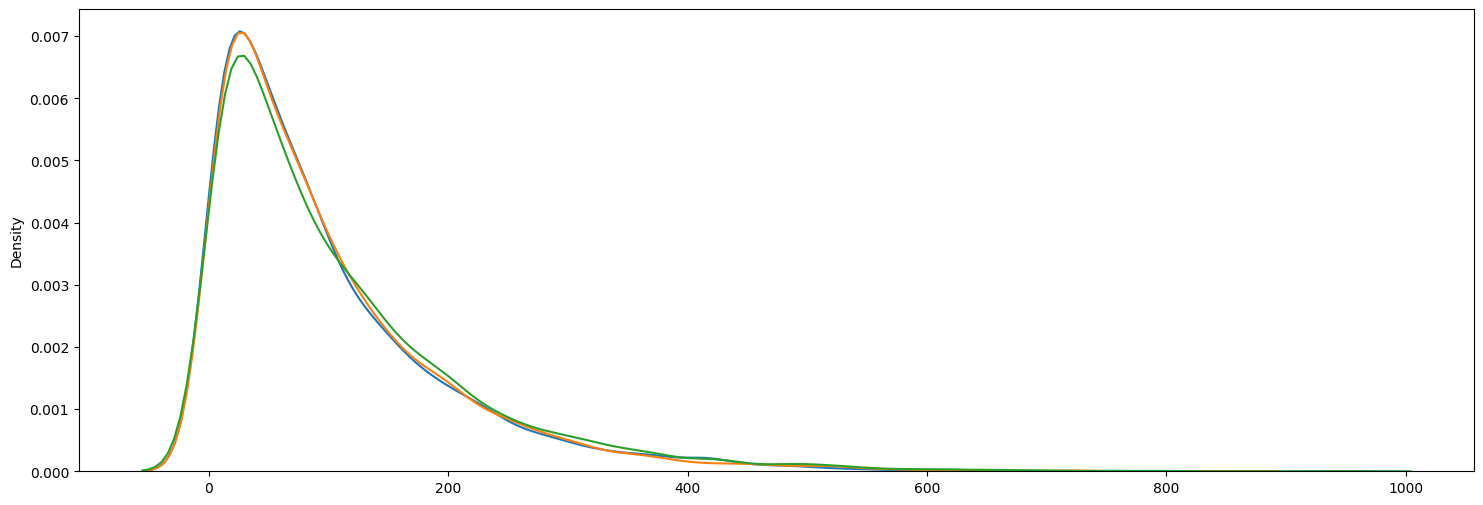

In [ ]:
# посмотрим как выглядят значения, полученные в 3 выборках
plt.figure(figsize=(18,6))
sns.kdeplot(sample_1)
sns.kdeplot(sample_2_zero_effect)
sns.kdeplot(sample_2_with_effect);

## Не нормальное распределение с нулями (ARPU)

Представим, что у нас есть исторические данные по ARPU классифайда. Будем их использовать для симуляции эксперимента.

ARPU = 39.62, 	ARPPU = 98.42, 	доля платящих = 0.40, 	ARPU std = 79.31



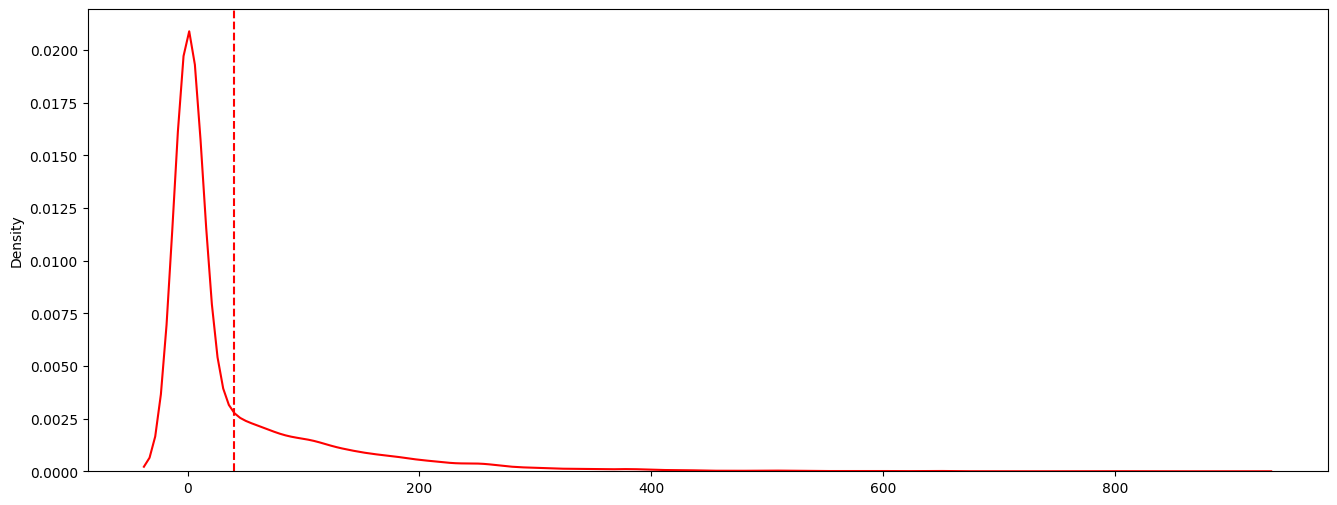

In [ ]:
# создадим исторические данные по ARPU
hist_PU_proportion_sample = 0.4
hist_mean_ARPPU = 100
sample_size = 1000

all_non_zero_ARPU = np.random.exponential(scale = hist_mean_ARPPU, size = 10000) # сгенерируем данные по всем платящим
zero_ARPU_mask = np.random.binomial(1, hist_PU_proportion_sample , size = 10000) # создадим маску превращающую некоторых платящих в неплатящих
hist_final_ARPU = np.round(all_non_zero_ARPU * zero_ARPU_mask, 0) # наложим маску

hist_ARPU_mean, hist_ARPU_std = hist_final_ARPU.mean(), hist_final_ARPU.std() # историческая средняя ARPU и стандартное отклонение
print(f'ARPU = {hist_ARPU_mean:.2f}, \tARPPU = {hist_final_ARPU[hist_final_ARPU > 0].mean():.2f}, \tдоля платящих = {np.sum(hist_final_ARPU != 0)/10000:.2f}, \tARPU std = {hist_ARPU_std:.2f}\n')

# отрисуем полученное распределение
plt.figure(figsize=(16,6))
sns.kdeplot(hist_final_ARPU, color = 'red')
plt.axvline(x = hist_final_ARPU.mean(), linestyle = '--', color = 'red', label = 'ARPU mean');

### t-test

Предположим что, мы хотим дать 5% скидку и надеемся, что вырастим ARPU на 10% за счет того, что подключится на 15% больше новых пользователей, которые раньше не платили. При этом те пользователи, которые платят, станут платить меньше в среднем на размер скидки (-5%).

Посмотрим как выглядят распределения этих двух возможных выборок ARPU.

In [ ]:
np.sum(hist_final_ARPU != 0), np.sum(final_ARPU_2_with_effect != 0)

(np.int64(4023), np.int64(4512))

Без скидки: Выручка = 396249, 	ARPU = 39.62, 	ARPPU = 98.42, 	кол-во платящих = 4026
Со скидкой: Выручка = 442573, 	ARPU = 44.26, 	ARPPU = 96.13, 	кол-во платящих = 4604


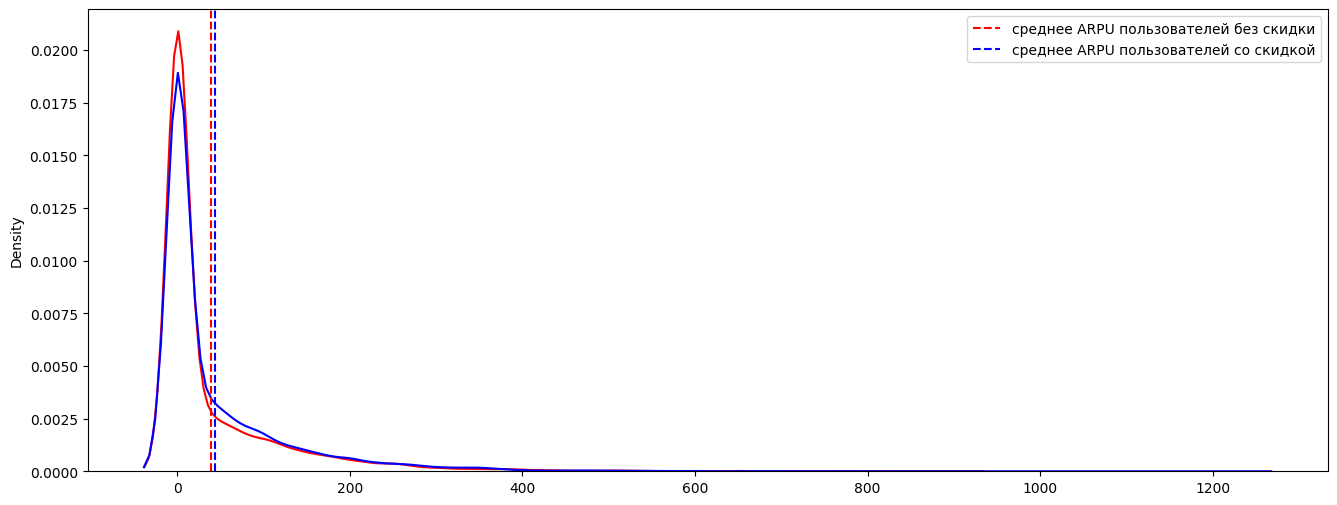

In [ ]:
all_non_zero_ARPU_2_with_effect = np.random.exponential(scale = hist_mean_ARPPU*(1-0.05), size = 10000) # добавим эффект снижающий ARPPU (скидки -5%)
zero_ARPU_mask_2_with_effect = np.random.binomial(1, 0.46 , size = 10000) # но увеличим процент платящих до 46%
final_ARPU_2_with_effect = np.round(all_non_zero_ARPU_2_with_effect * zero_ARPU_mask_2_with_effect,0)

# отрисуем историческое распределение ARPU и полученное после скидок
plt.figure(figsize=(16, 6))
sns.kdeplot(hist_final_ARPU, color = 'red')
sns.kdeplot(final_ARPU_2_with_effect, color = 'blue')
plt.axvline(x = hist_final_ARPU.mean(), linestyle = '--', color = 'red', label = 'среднее ARPU пользователей без скидки')
plt.axvline(x = final_ARPU_2_with_effect.mean(), linestyle = '--', color = 'blue', label = 'среднее ARPU пользователей со скидкой')
plt.legend()

print(f'Без скидки: Выручка = {hist_final_ARPU.sum():.0f}, \tARPU = {hist_final_ARPU.mean():.2f}, \tARPPU = {hist_final_ARPU[hist_final_ARPU > 0].mean():.2f}, \tкол-во платящих = {np.sum(hist_final_ARPU != 0):.0f}')
print(f'Со скидкой: Выручка = {final_ARPU_2_with_effect.sum():.0f}, \tARPU = {final_ARPU_2_with_effect.mean():.2f}, \tARPPU = {final_ARPU_2_with_effect[final_ARPU_2_with_effect > 0].mean():.2f}, \tкол-во платящих = {np.sum(final_ARPU_2_with_effect != 0):.0f}')

H0: ARPU у пользователей, получивших скидку, больше на 10%

Исторический ARPPU = 100, 	ожидаемый ARPPU со скидкой = 95.0, 	историческая доля платящих = 0.4, 	доля платящих со скидкой = 0.46
Абсолютный размер ожидаемого эффекта = 3.96, 	cohen's d = 0.05, 	минимальный размер каждой выборки для детекции эффекта = 6289, 	кол-во симуляций = 1000

Медиана эффекта для AA симуляции = 0.06, 	Alpha (FPR) = 0.05, 	Alpha 95% CI: (0.04, 0.07)
Медиана эффекта для AB симуляции = 4.05, 	Power (TPR) = 0.79, 	Power 95% CI: (0.76, 0.81)



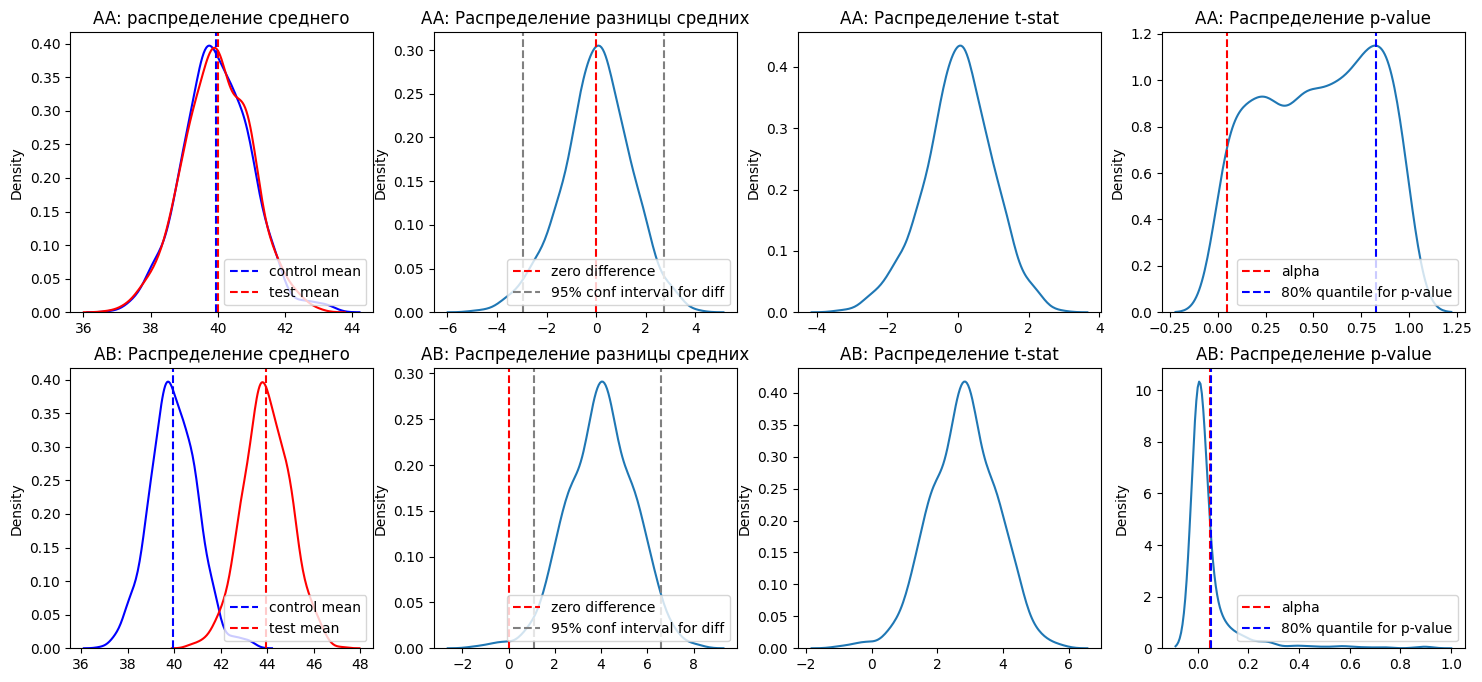

In [ ]:
# определим дизайн теста
alpha, beta, rel_lift = 0.05, 0.2, 0.1
power, abs_lift, effect_size = 1-beta, hist_ARPU_mean*rel_lift, hist_ARPU_mean*rel_lift/hist_ARPU_std

# находим размер выборки
sample_size = int(tt_ind_solve_power(effect_size=effect_size, alpha=alpha, power=power, nobs1=None, ratio=1))

# для симуляции эффекта зададим прирост процента платящих и размер скидки
PU_proportion_sample_1, PU_proportion_sample_2, discount, mean_ARPPU_1, mean_ARPPU_2 = 0.4, 0.463, 0.05, hist_mean_ARPPU, hist_mean_ARPPU*0.95

print(f'Исторический ARPPU = {mean_ARPPU_1}, \tожидаемый ARPPU со скидкой = {mean_ARPPU_2}, \tисторическая доля платящих = {PU_proportion_sample_1}, \tдоля платящих со скидкой = {PU_proportion_sample_2:.2f}')
print(f"Абсолютный размер ожидаемого эффекта = {abs_lift:.2f}, \tcohen's d = {effect_size:.2f}, \tминимальный размер каждой выборки для детекции эффекта = {sample_size}, \tкол-во симуляций = {n_iter}")

# создаем пустые листы, которые будут заполняться нужными значениями по мере работы цикла
aa_control_group_means, aa_test_group_means = [], []
ab_control_group_means, ab_test_group_means = [], []

aa_p_val_list, aa_t_stat_list, aa_means_diffs_list = [], [], []
ab_p_val_list, ab_t_stat_list, ab_means_diffs_list = [], [], []

for i in range(n_iter):
    # создаем контрольную выборку
    all_non_zero_ARPU_1 = np.random.exponential(scale = hist_mean_ARPPU, size = sample_size)
    zero_ARPU_mask_1 = np.random.binomial(1, PU_proportion_sample_1 , size = sample_size)
    final_ARPU_1 = all_non_zero_ARPU_1 * zero_ARPU_mask_1
    final_ARPU_1 = np.round(final_ARPU_1, 0)

    # создаем тестовую выборку без эффекта
    all_non_zero_ARPU_1_zero_effect = np.random.exponential(scale = hist_mean_ARPPU, size = sample_size)
    zero_ARPU_mask_1_zero_effect = np.random.binomial(1, PU_proportion_sample_1, size = sample_size)
    final_ARPU_1_zero_effect = all_non_zero_ARPU_1_zero_effect * zero_ARPU_mask_1_zero_effect
    final_ARPU_1_zero_effect = np.round(final_ARPU_1_zero_effect, 0)

    # создаем тестовую выборку с эффектом
    all_non_zero_ARPU_2_with_effect = np.random.exponential(scale = hist_mean_ARPPU*(1-discount), size = sample_size)
    zero_ARPU_mask_2_with_effect = np.random.binomial(1, PU_proportion_sample_2 , size = sample_size)
    final_ARPU_2_with_effect = all_non_zero_ARPU_2_with_effect * zero_ARPU_mask_2_with_effect
    final_ARPU_2_with_effect = np.round(final_ARPU_2_with_effect, 0)

    # рассчитываем нужные метрики
    aa_control_group_means.append(final_ARPU_1.mean())
    aa_test_group_means.append(final_ARPU_1_zero_effect.mean())

    ab_control_group_means.append(final_ARPU_1.mean())
    ab_test_group_means.append(final_ARPU_2_with_effect.mean())

    aa_means_diff = final_ARPU_1_zero_effect.mean() - final_ARPU_1.mean()
    ab_means_diff = final_ARPU_2_with_effect.mean() - final_ARPU_1.mean()

    aa_t_stat, aa_p_val = ttest_ind(final_ARPU_1_zero_effect, final_ARPU_1)
    ab_t_stat, ab_p_val = ttest_ind(final_ARPU_2_with_effect, final_ARPU_1)

    aa_p_val_list.append(aa_p_val)
    ab_p_val_list.append(ab_p_val)

    aa_t_stat_list.append(aa_t_stat)
    ab_t_stat_list.append(ab_t_stat)

    aa_means_diffs_list.append(aa_means_diff)
    ab_means_diffs_list.append(ab_means_diff)

experiment_simulation_plot(alpha = 0.05,
                           aa_control_group_means = aa_control_group_means,
                           aa_test_group_means = aa_test_group_means,
                           aa_means_diffs_list = aa_means_diffs_list,
                           aa_stat_list = aa_t_stat_list,
                           aa_p_val_list = aa_p_val_list,
                           ab_control_group_means = ab_control_group_means,
                           ab_test_group_means = ab_test_group_means,
                           ab_means_diffs_list = ab_means_diffs_list,
                           ab_stat_list = ab_t_stat_list,
                           ab_p_val_list = ab_p_val_list)

**Вывод:** T-test и тут справляется хорошо. Выдерживает нужную альфа и бета.

### тест Манна-Уитни

Исторический ARPPU = 100, 	ожидаемый ARPPU со скидкой = 95.0, 	историческая доля платящих = 0.4, 	доля платящих со скидкой = 0.46
Абсолютный размер ожидаемого эффекта = 3.96, 	cohen's d = 0.05, 	минимальный размер каждой выборки для детекции эффекта = 6289, 	кол-во симуляций = 1000

Медиана эффекта для AA симуляции = 0.02, 	Alpha (FPR) = 0.04, 	Alpha 95% CI: (0.03, 0.05)
Медиана эффекта для AB симуляции = 3.97, 	Power (TPR) = 1.00, 	Power 95% CI: (1.00, 1.00)



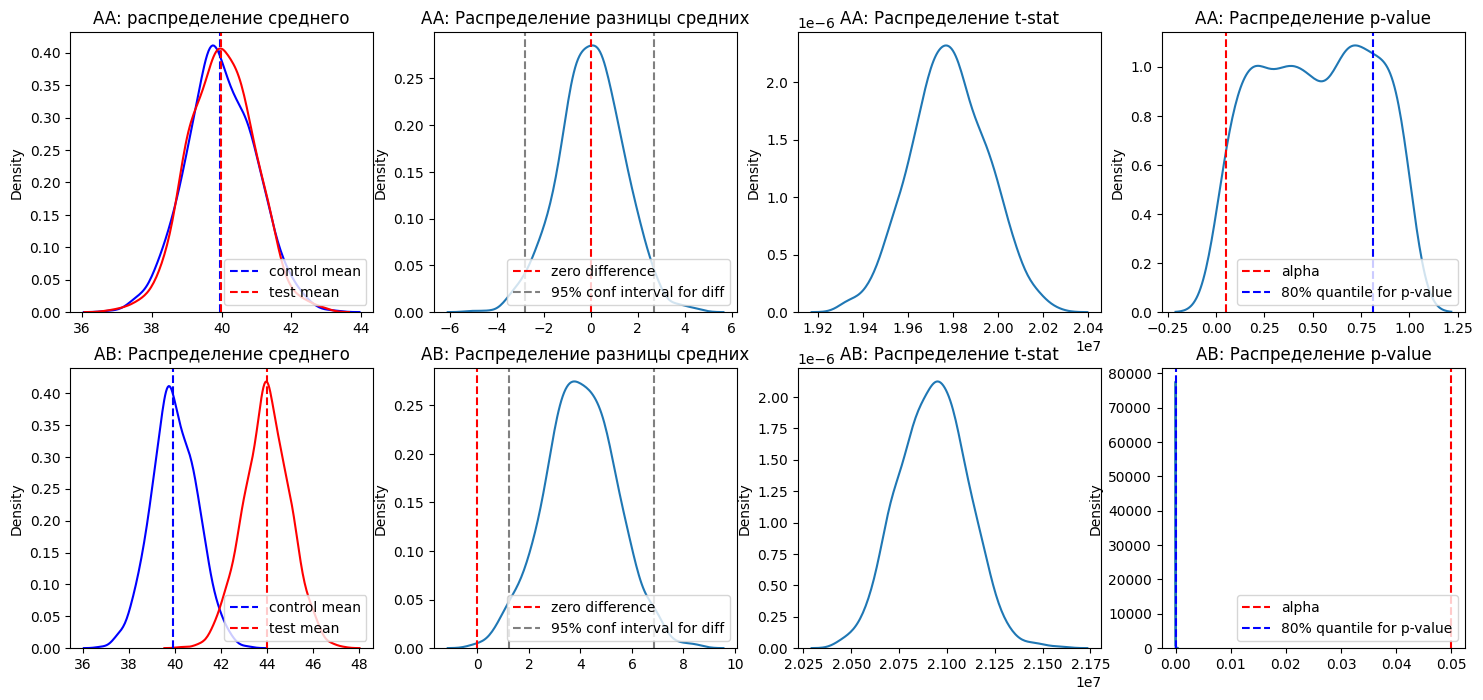

In [ ]:
# определим дизайн теста
alpha, beta, rel_lift = 0.05, 0.2, 0.1
power, abs_lift, effect_size = 1-beta, hist_ARPU_mean*rel_lift, hist_ARPU_mean*rel_lift/hist_ARPU_std

# находим размер выборки
sample_size = int(tt_ind_solve_power(effect_size=effect_size, alpha=alpha, power=power, nobs1=None, ratio=1))

# для симуляции эффекта зададим прирост процента платящих и размер скидки
PU_proportion_sample_1, PU_proportion_sample_2, discount, mean_ARPPU_1, mean_ARPPU_2 = 0.4, 0.463, 0.05, hist_mean_ARPPU, hist_mean_ARPPU*0.95

print(f'Исторический ARPPU = {mean_ARPPU_1}, \tожидаемый ARPPU со скидкой = {mean_ARPPU_2}, \tисторическая доля платящих = {PU_proportion_sample_1}, \tдоля платящих со скидкой = {PU_proportion_sample_2:.2f}')
print(f"Абсолютный размер ожидаемого эффекта = {abs_lift:.2f}, \tcohen's d = {effect_size:.2f}, \tминимальный размер каждой выборки для детекции эффекта = {sample_size}, \tкол-во симуляций = {n_iter}")

# создаем пустые листы, которые будут заполняться нужными значениями по мере работы цикла
aa_control_group_means, aa_test_group_means = [], []
ab_control_group_means, ab_test_group_means = [], []

aa_p_val_list, aa_u_stat_list, aa_means_diffs_list = [], [], []
ab_p_val_list, ab_u_stat_list, ab_means_diffs_list = [], [], []

for i in range(n_iter):
    # создаем контрольную выборку
    all_non_zero_ARPU_1 = np.random.exponential(scale = hist_mean_ARPPU, size = sample_size)
    zero_ARPU_mask_1 = np.random.binomial(1, PU_proportion_sample_1 , size = sample_size)
    final_ARPU_1 = all_non_zero_ARPU_1 * zero_ARPU_mask_1
    final_ARPU_1 = np.round(final_ARPU_1, 0)

    # создаем тестовую выборку без эффекта
    all_non_zero_ARPU_1_zero_effect = np.random.exponential(scale = hist_mean_ARPPU, size = sample_size)
    zero_ARPU_mask_1_zero_effect = np.random.binomial(1, PU_proportion_sample_1, size = sample_size)
    final_ARPU_1_zero_effect = all_non_zero_ARPU_1_zero_effect * zero_ARPU_mask_1_zero_effect
    final_ARPU_1_zero_effect = np.round(final_ARPU_1_zero_effect, 0)

    # создаем тестовую выборку с эффектом
    all_non_zero_ARPU_2_with_effect = np.random.exponential(scale = hist_mean_ARPPU*(1-discount), size = sample_size)
    zero_ARPU_mask_2_with_effect = np.random.binomial(1, PU_proportion_sample_2 , size = sample_size)
    final_ARPU_2_with_effect = all_non_zero_ARPU_2_with_effect * zero_ARPU_mask_2_with_effect
    final_ARPU_2_with_effect = np.round(final_ARPU_2_with_effect, 0)

    # рассчитываем нужные метрики
    aa_control_group_means.append(final_ARPU_1.mean())
    aa_test_group_means.append(final_ARPU_1_zero_effect.mean())

    ab_control_group_means.append(final_ARPU_1.mean())
    ab_test_group_means.append(final_ARPU_2_with_effect.mean())

    aa_means_diff = final_ARPU_1_zero_effect.mean() - final_ARPU_1.mean()
    ab_means_diff = final_ARPU_2_with_effect.mean() - final_ARPU_1.mean()

    aa_u_stat, aa_p_val = mannwhitneyu(final_ARPU_1_zero_effect, final_ARPU_1)
    ab_u_stat, ab_p_val = mannwhitneyu(final_ARPU_2_with_effect, final_ARPU_1)

    aa_p_val_list.append(aa_p_val)
    ab_p_val_list.append(ab_p_val)

    aa_u_stat_list.append(aa_u_stat)
    ab_u_stat_list.append(ab_u_stat)

    aa_means_diffs_list.append(aa_means_diff)
    ab_means_diffs_list.append(ab_means_diff)

experiment_simulation_plot(alpha = 0.05,
                           aa_control_group_means = aa_control_group_means,
                           aa_test_group_means = aa_test_group_means,
                           aa_means_diffs_list = aa_means_diffs_list,
                           aa_stat_list = aa_u_stat_list,
                           aa_p_val_list = aa_p_val_list,

                           ab_control_group_means = ab_control_group_means,
                           ab_test_group_means = ab_test_group_means,
                           ab_means_diffs_list = ab_means_diffs_list,
                           ab_stat_list = ab_u_stat_list,
                           ab_p_val_list = ab_p_val_list)

**Вывод:** Критерий Манна-Уитни конкретно для этого распределения смог показать более высокую мощность.

Почему он оказался более чувствительных, хотя распределение по прежнему экспотенциальное?

Что произошло: 6% наблюдения с нулями мы перевели в числовые значения. Поскольку Манн-Уитни работает с рангами, он заметил это изменение и поставил новые ранги, которые больше чем нули (которые были в тестовой группе). Поэтому мощность увеличилась.

**Но такой результат с хоршей мощностью не гарантируется при использовании Манна-Уитни**

Поэтому перед запуском стат-критерия лучше проверить его на исторических данных

### Сравнимаем мощность t-test и Манна-Уитни

Если Манна-Уитни стал мощнее, мы можем изменить дизайн эксперимента:
 - уменьшить размер выборки
 - уменьшить MDE (увеличить чувствительность)

Попробуем через симуляции определить, какая выборка нам была бы достаточна для достижения 80% мощности в тесте.

In [ ]:
# создадим функцию проводящую одну итерацию теста по заданным гиперпараметрам
# и возвращающую p-value для АА-теста и АВ-теста

def simulate_one_arpu_aab_test(h0_ARPPU, h1_ARPPU, h0_PU_prop, h1_PU_prop, sample_size, criteria):
    '''
    функция проводящая один Манна_Уитни тест на ARPU с заданными параметрами
    h0_ARPPU - ARPPU в контрольной выборке
    h1_ARPPU - ARPPU в тестовой выборке
    h0_PU_prop - процент платящих в контрольной выборке
    h1_PU_prop - процент платящих в тестовой выборке
    sample_size - размер выборки в тесте
    criteria - ['mw', 'tt'] реализация под 2 стат критерия Манна-Уитни и Т-тест
    '''
    # создаем контрольную выборку
    all_non_zero_ARPU_1 = np.random.exponential(scale = h0_ARPPU, size = sample_size)
    zero_ARPU_mask_1 = np.random.binomial(1, h0_PU_prop , size = sample_size)
    final_ARPU_1 = all_non_zero_ARPU_1 * zero_ARPU_mask_1
    final_ARPU_1 = np.round(final_ARPU_1, 0)

    # создаем тестовую выборку без эффекта
    all_non_zero_ARPU_1_zero_effect = np.random.exponential(scale = h0_ARPPU, size = sample_size)
    zero_ARPU_mask_1_zero_effect = np.random.binomial(1, h0_PU_prop, size = sample_size)
    final_ARPU_1_zero_effect = all_non_zero_ARPU_1_zero_effect * zero_ARPU_mask_1_zero_effect
    final_ARPU_1_zero_effect = np.round(final_ARPU_1_zero_effect, 0)

    # создаем тестовую выборку с эффектом
    all_non_zero_ARPU_2_with_effect = np.random.exponential(scale = h1_ARPPU, size = sample_size)
    zero_ARPU_mask_2_with_effect = np.random.binomial(1, h1_PU_prop , size = sample_size)
    final_ARPU_2_with_effect = all_non_zero_ARPU_2_with_effect * zero_ARPU_mask_2_with_effect
    final_ARPU_2_with_effect = np.round(final_ARPU_2_with_effect, 0)

    # рассчитываем нужные метрики
    aa_means_diff = final_ARPU_1_zero_effect.mean() - final_ARPU_1.mean()
    ab_means_diff = final_ARPU_2_with_effect.mean() - final_ARPU_1.mean()

    if criteria=='tt':
        aa_t_stat, aa_p_val = ttest_ind(final_ARPU_1_zero_effect, final_ARPU_1)
        ab_t_stat, ab_p_val = ttest_ind(final_ARPU_2_with_effect, final_ARPU_1)

    if criteria=='mw':
        _, aa_p_val = mannwhitneyu(final_ARPU_1_zero_effect, final_ARPU_1)
        _, ab_p_val = mannwhitneyu(final_ARPU_2_with_effect, final_ARPU_1)

    return(aa_means_diff, ab_means_diff, aa_p_val, ab_p_val)

In [ ]:
# прогоним циклом такой тест многократно, чтобы понять уровень альфа и бета в n_sim симуляциях
# для удобства создадим функцию для этого.

def get_alpha_beta_many_arpu_aab_tests(h0_ARPPU, h1_ARPPU, h0_PU_prop, h1_PU_prop, sample_size, n_sim, criteria):
    '''
    функция проводящая многократно тесты на ARPU с заданными параметрами
    h0_ARPPU - ARPPU в контрольной выборке
    h1_ARPPU - ARPPU в тестовой выборке
    h0_PU_prop - процент платящих в контрольной выборке
    h1_PU_prop - процент платящих в тестовой выборке
    sample_size - размер выборки в тесте
    n_sim - кол-во симуляций
    criteria - ['mw', 'tt'] реализация под 2 стат критерия Манна-Уитни и Т-тест
    output - возвращает alpha, beta и 95%-доверительные интервалы
    '''
    aa_means_diff_list, ab_means_diff_list, aa_p_val_list, ab_p_val_list = [], [], [], []

    for i in range(n_sim):
        aa_means_diff, ab_means_diff, aa_p_val, ab_p_val = simulate_one_arpu_aab_test(h0_ARPPU, h1_ARPPU, h0_PU_prop, h1_PU_prop, sample_size, criteria)
        aa_means_diff_list.append(aa_means_diff)
        ab_means_diff_list.append(ab_means_diff)
        aa_p_val_list.append(aa_p_val)
        ab_p_val_list.append(ab_p_val)

    alpha = np.sum(np.array(aa_p_val_list) < 0.05) / n_sim
    beta = np.sum(np.array(ab_p_val_list) < 0.05) / n_sim

    alpha_ci = proportion_confint(np.sum(np.array(aa_p_val_list) < 0.05), n_sim, alpha=0.05)
    beta_ci = proportion_confint(np.sum(np.array(ab_p_val_list) < 0.05), n_sim, alpha=0.05)

    output = {'alpha':alpha, 'beta': beta, 'alpha_ci':alpha_ci, 'beta_ci':beta_ci}

    return(output)

In [ ]:
# прогоним симуляцию на выборке 1000 наблюдений и с 500 симуляциями с t-тестом
output = get_alpha_beta_many_arpu_aab_tests(100, 95, 0.4, 0.46, 1000, 500, criteria = 'tt')
output

{'alpha': np.float64(0.042),
 'beta': np.float64(0.17),
 'alpha_ci': (0.024417910413750656, 0.059582089586249345),
 'beta_ci': (0.13707493843286117, 0.20292506156713885)}

In [ ]:
# прогоним симуляцию на выборке 1000 наблюдений и с 500 симуляциями с тестом Манна-Уитни
output = get_alpha_beta_many_arpu_aab_tests(100, 95, 0.4, 0.46, 1000, 500, criteria = 'mw')
output

{'alpha': np.float64(0.052),
 'beta': np.float64(0.666),
 'alpha_ci': (0.03253883076354673, 0.07146116923645326),
 'beta_ci': (0.6246597178067086, 0.7073402821932915)}

Циклом прогоним и посмотрим, как ведут себя ошибки первого и второго рода при росте размера выборки в нашем конкретном кейсе

CPU times: user 3min 14s, sys: 297 ms, total: 3min 14s
Wall time: 3min 16s


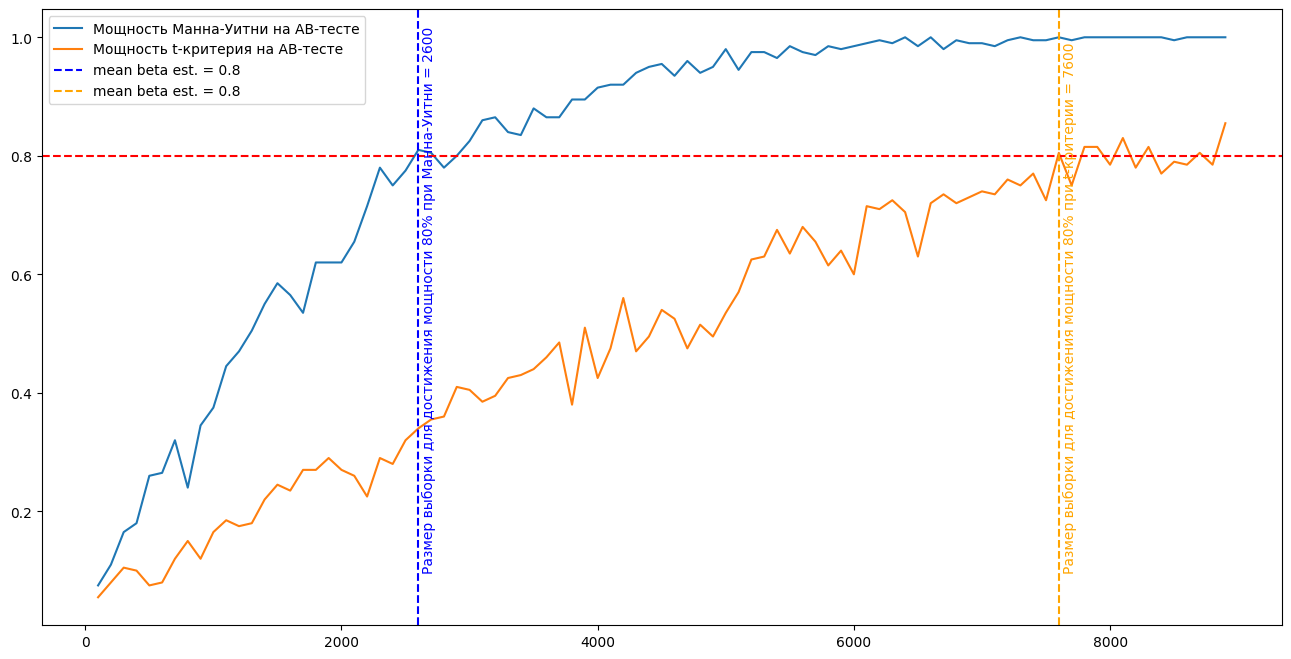

In [ ]:
%%time
sample_size_list = np.arange(100, 9000, 100) # зададим линейное пространство размера выборок, по которому мы будем перебирать
mw_alphas_list, mw_betas_list, mw_lower_beta_ci_list, mw_upper_beta_ci_list = [], [], [], []
tt_alphas_list, tt_betas_list, tt_lower_beta_ci_list, tt_upper_beta_ci_list = [], [], [], []

# прогоним циклом, где для каждого размера выборки мы численно находим мощность и другие параметры
for i in sample_size_list:
    mw_output = get_alpha_beta_many_arpu_aab_tests(h0_ARPPU=100, h1_ARPPU=80, h0_PU_prop=0.4, h1_PU_prop=0.46, sample_size=i, n_sim=200, criteria='mw')
    mw_alpha, mw_beta, mw_alpha_ci, mw_beta_ci = mw_output['alpha'], mw_output['beta'], mw_output['alpha_ci'], mw_output['beta_ci']
    mw_alphas_list.append(mw_alpha)
    mw_betas_list.append(mw_beta)
    mw_lower_beta_ci_list.append(mw_beta_ci[0])
    mw_upper_beta_ci_list.append(mw_beta_ci[1])

    tt_output = get_alpha_beta_many_arpu_aab_tests(h0_ARPPU=100, h1_ARPPU=80, h0_PU_prop=0.4, h1_PU_prop=0.46, sample_size=i, n_sim=200, criteria='tt')
    tt_alpha, tt_beta, tt_alpha_ci, tt_beta_ci = tt_output['alpha'], tt_output['beta'], tt_output['alpha_ci'], tt_output['beta_ci']
    tt_alphas_list.append(tt_alpha)
    tt_betas_list.append(tt_beta)
    tt_lower_beta_ci_list.append(tt_beta_ci[0])
    tt_upper_beta_ci_list.append(tt_beta_ci[1])

# Отрисуем результаты симуляции, полученные на прошлом этапе. Посмотрим рост мощности теста.
mw_beta_est_index = np.argmax(np.array(mw_betas_list) >= 0.8)
tt_beta_est_index = np.argmax(np.array(tt_betas_list) >= 0.8)

plt.figure(figsize=(16, 8))
sns.lineplot(x = sample_size_list, y = mw_betas_list, label = 'Мощность Манна-Уитни на AB-тесте')
sns.lineplot(x = sample_size_list, y = tt_betas_list, label = 'Мощность t-критерия на AB-тесте')
plt.axhline(0.8, color = 'red', linestyle ='--')
plt.axvline(sample_size_list[mw_beta_est_index], color = 'blue', linestyle ='--', label = 'mean beta est. = 0.8')
plt.text(sample_size_list[mw_beta_est_index] + 30, 0.1, f'Размер выборки для достижения мощности 80% при Манна-Уитни = {sample_size_list[mw_beta_est_index]}', rotation = 'vertical', color = 'blue')
plt.axvline(sample_size_list[tt_beta_est_index], color = 'orange', linestyle ='--', label = 'mean beta est. = 0.8')
plt.text(sample_size_list[tt_beta_est_index] + 30, 0.1, f'Размер выборки для достижения мощности 80% при t-критерии = {sample_size_list[tt_beta_est_index]}', rotation = 'vertical', color = 'orange')
plt.legend();

Необходимая мощность при Манна-Уитни достигается почти в 3 раза быстрее, чем при t-тесте. Однако, у Манна-Уитни есть нюансы, которые ограничивают его применение, и которых будет сказано позже

Ошибка первого рода колеблется около 0,05 - это нормальное поведение для $\alpha$

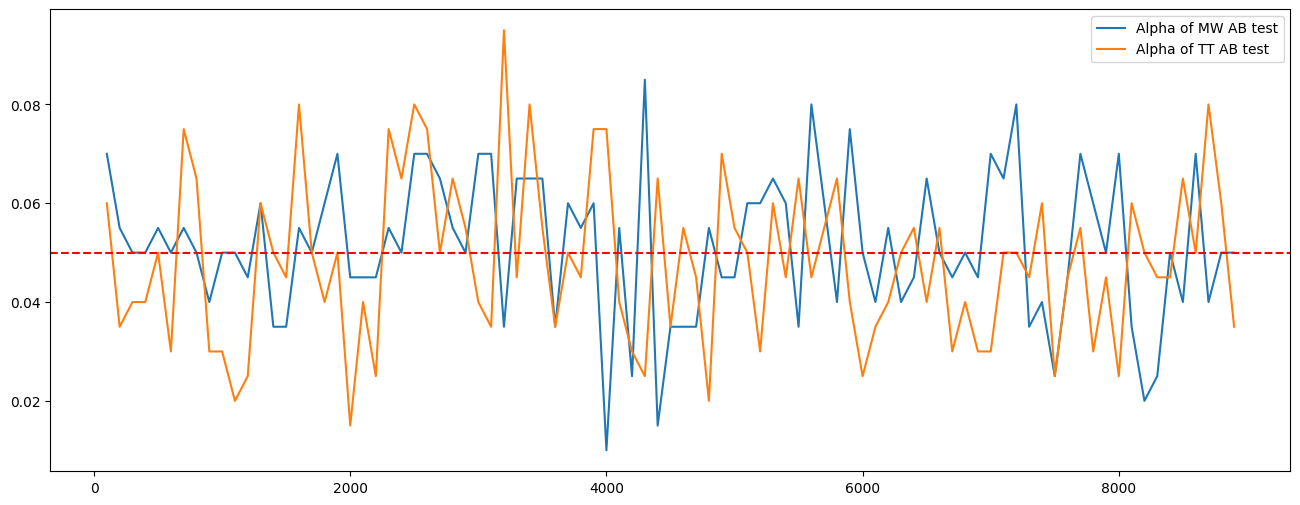

In [ ]:
# посмотрим поведение ошибки alpha
plt.figure(figsize=(16,6))
sns.lineplot(x = sample_size_list, y = mw_alphas_list, label = 'Alpha of MW AB test')
sns.lineplot(x = sample_size_list, y = tt_alphas_list, label = 'Alpha of TT AB test')
plt.axhline(0.05, color = 'red', linestyle ='--')
plt.legend();

## Проверка гипотез с составными метриками

Посмотрим на основной минус критерия Манна-Уитни - что его результаты надо использовать острожно, т.к. он может проверять не те гипотезы, которые изначально подразумевали. Он не смотрит на разницу средних, а мы ожидаем, что он проверяет именно это.

### тест Манна-Уитни

Прогоним тот же тест с ARPU, что выше, но сделаем так, чтобы ARPU на самом деле не различался в двух группах. Для это немного изменим прирост процента платящих.

Новый прирост платящих при 5% скидки составит не 46%, а 42% исходя из равенства:

40%\*100% = 42%\*95%

Исторический ARPPU = 100, 	ожидаемый ARPPU со скидкой = 95.0, 	историческая доля платящих = 0.4, 	доля платящих со скидкой = 0.46
Абсолютный размер ожидаемого эффекта = 3.96, 	cohen's d = 0.05, 	минимальный размер каждой выборки для детекции эффекта = 6289, 	кол-во симуляций = 1000

Медиана эффекта для AA симуляции = 0.04, 	Alpha (FPR) = 0.05, 	Alpha 95% CI: (0.03, 0.06)
Медиана эффекта для AB симуляции = -0.13, 	Power (TPR) = 0.40, 	Power 95% CI: (0.37, 0.43)



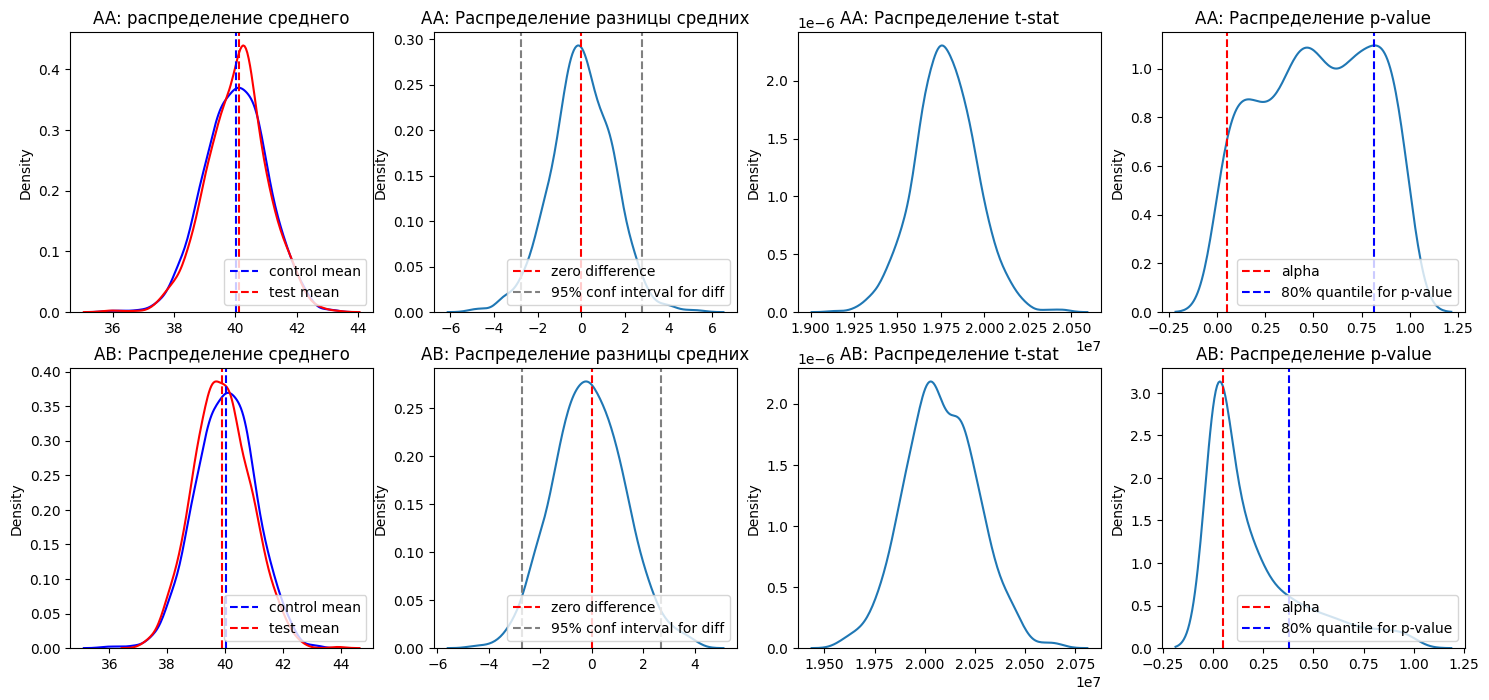

In [ ]:
# определим дизайн теста
alpha, beta, rel_lift = 0.05, 0.2, 0.1
power, abs_lift, effect_size = 1-beta, hist_ARPU_mean*rel_lift, hist_ARPU_mean*rel_lift/hist_ARPU_std

# находим размер выборки
sample_size = int(tt_ind_solve_power(effect_size=effect_size, alpha=alpha, power=power, nobs1=None, ratio=1))

# для симуляции эффекта зададим прирост процента платящих и размер скидки
PU_proportion_sample_1, PU_proportion_sample_2, discount, mean_ARPPU_1, mean_ARPPU_2 = 0.4, 0.463, 0.05, hist_mean_ARPPU, hist_mean_ARPPU*0.95

print(f'Исторический ARPPU = {mean_ARPPU_1}, \tожидаемый ARPPU со скидкой = {mean_ARPPU_2}, \tисторическая доля платящих = {PU_proportion_sample_1}, \tдоля платящих со скидкой = {PU_proportion_sample_2:.2f}')
print(f"Абсолютный размер ожидаемого эффекта = {abs_lift:.2f}, \tcohen's d = {effect_size:.2f}, \tминимальный размер каждой выборки для детекции эффекта = {sample_size}, \tкол-во симуляций = {n_iter}")

# создаем пустые листы, которые будут заполняться нужными значениями по мере работы цикла
aa_control_group_means, aa_test_group_means = [], []
ab_control_group_means, ab_test_group_means = [], []

aa_p_val_list, aa_u_stat_list, aa_means_diffs_list = [], [], []
ab_p_val_list, ab_u_stat_list, ab_means_diffs_list = [], [], []

for i in range(n_iter):
    # создаем контрольную выборку
    all_non_zero_ARPU_1 = np.random.exponential(scale = hist_mean_ARPPU, size = sample_size)
    zero_ARPU_mask_1 = np.random.binomial(1, PU_proportion_sample_1 , size = sample_size)
    final_ARPU_1 = all_non_zero_ARPU_1 * zero_ARPU_mask_1
    final_ARPU_1 = np.round(final_ARPU_1, 0)

    # создаем тестовую выборку без эффекта
    all_non_zero_ARPU_1_zero_effect = np.random.exponential(scale = hist_mean_ARPPU, size = sample_size)
    zero_ARPU_mask_1_zero_effect = np.random.binomial(1, PU_proportion_sample_1, size = sample_size)
    final_ARPU_1_zero_effect = all_non_zero_ARPU_1_zero_effect * zero_ARPU_mask_1_zero_effect
    final_ARPU_1_zero_effect = np.round(final_ARPU_1_zero_effect, 0)

    # создаем тестовую выборку с эффектом
    all_non_zero_ARPU_2_with_effect = np.random.exponential(scale = hist_mean_ARPPU*(1-discount), size = sample_size)
    zero_ARPU_mask_2_with_effect = np.random.binomial(1, 0.42 , size = sample_size) # эффект прироста процента платящих ниже, чем в предыдущем примере
    final_ARPU_2_with_effect = all_non_zero_ARPU_2_with_effect * zero_ARPU_mask_2_with_effect
    final_ARPU_2_with_effect = np.round(final_ARPU_2_with_effect, 0)

    # рассчитываем нужные метрики
    aa_control_group_means.append(final_ARPU_1.mean())
    aa_test_group_means.append(final_ARPU_1_zero_effect.mean())

    ab_control_group_means.append(final_ARPU_1.mean())
    ab_test_group_means.append(final_ARPU_2_with_effect.mean())

    aa_means_diff = final_ARPU_1_zero_effect.mean() - final_ARPU_1.mean()
    ab_means_diff = final_ARPU_2_with_effect.mean() - final_ARPU_1.mean()

    aa_u_stat, aa_p_val = mannwhitneyu(final_ARPU_1_zero_effect, final_ARPU_1)
    ab_u_stat, ab_p_val = mannwhitneyu(final_ARPU_2_with_effect, final_ARPU_1)

    aa_p_val_list.append(aa_p_val)
    ab_p_val_list.append(ab_p_val)

    aa_u_stat_list.append(aa_u_stat)
    ab_u_stat_list.append(ab_u_stat)

    aa_means_diffs_list.append(aa_means_diff)
    ab_means_diffs_list.append(ab_means_diff)

experiment_simulation_plot(alpha = 0.05,
                           aa_control_group_means = aa_control_group_means,
                           aa_test_group_means = aa_test_group_means,
                           aa_means_diffs_list = aa_means_diffs_list,
                           aa_stat_list = aa_u_stat_list,
                           aa_p_val_list = aa_p_val_list,

                           ab_control_group_means = ab_control_group_means,
                           ab_test_group_means = ab_test_group_means,
                           ab_means_diffs_list = ab_means_diffs_list,
                           ab_stat_list = ab_u_stat_list,
                           ab_p_val_list = ab_p_val_list)

**Вывод:** Как мы видим, здесь несмотря на то, что по-настоящему средние ARPU не различаются, критерий все равно довольно часто в ~40% случаев отлавливает какой-то эффект. Критерий смотрит на другие изменения в распределении рангов. Рост процента платящих на 2% выше влияет на ранговое распределение, что критерий и замечает.

### t-test

Исторический ARPPU = 100, 	ожидаемый ARPPU со скидкой = 95.0, 	историческая доля платящих = 0.4, 	доля платящих со скидкой = 0.46
Абсолютный размер ожидаемого эффекта = 3.96, 	cohen's d = 0.05, 	минимальный размер каждой выборки для детекции эффекта = 6289, 	кол-во симуляций = 1000

Медиана эффекта для AA симуляции = 0.08, 	Alpha (FPR) = 0.06, 	Alpha 95% CI: (0.04, 0.07)
Медиана эффекта для AB симуляции = -0.02, 	Power (TPR) = 0.06, 	Power 95% CI: (0.05, 0.08)



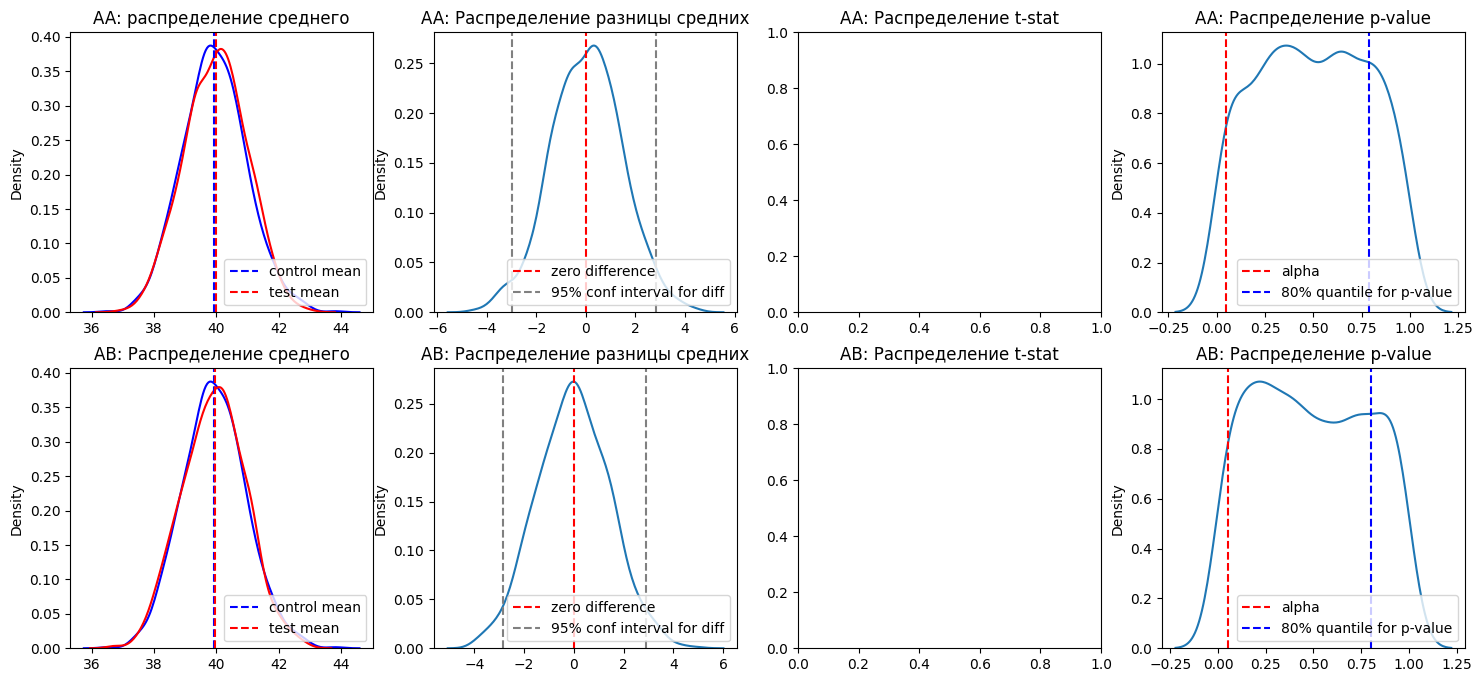

In [ ]:
# определим дизайн теста
alpha, beta, rel_lift = 0.05, 0.2, 0.1
power, abs_lift, effect_size = 1-beta, hist_ARPU_mean*rel_lift, hist_ARPU_mean*rel_lift/hist_ARPU_std

# находим размер выборки
sample_size = int(tt_ind_solve_power(effect_size=effect_size, alpha=alpha, power=power, nobs1=None, ratio=1))

# для симуляции эффекта зададим прирост процента платящих и размер скидки
PU_proportion_sample_1, PU_proportion_sample_2, discount, mean_ARPPU_1, mean_ARPPU_2 = 0.4, 0.463, 0.05, hist_mean_ARPPU, hist_mean_ARPPU*0.95

print(f'Исторический ARPPU = {mean_ARPPU_1}, \tожидаемый ARPPU со скидкой = {mean_ARPPU_2}, \tисторическая доля платящих = {PU_proportion_sample_1}, \tдоля платящих со скидкой = {PU_proportion_sample_2:.2f}')
print(f"Абсолютный размер ожидаемого эффекта = {abs_lift:.2f}, \tcohen's d = {effect_size:.2f}, \tминимальный размер каждой выборки для детекции эффекта = {sample_size}, \tкол-во симуляций = {n_iter}")

# создаем пустые листы, которые будут заполняться нужными значениями по мере работы цикла
aa_control_group_means, aa_test_group_means = [], []
ab_control_group_means, ab_test_group_means = [], []

aa_p_val_list, aa_t_stat_list, aa_means_diffs_list = [], [], []
ab_p_val_list, ab_t_stat_list, ab_means_diffs_list = [], [], []

for i in range(n_iter):
    # создаем контрольную выборку
    all_non_zero_ARPU_1 = np.random.exponential(scale = hist_mean_ARPPU, size = sample_size)
    zero_ARPU_mask_1 = np.random.binomial(1, PU_proportion_sample_1 , size = sample_size)
    final_ARPU_1 = all_non_zero_ARPU_1 * zero_ARPU_mask_1
    final_ARPU_1 = np.round(final_ARPU_1, 0)

    # создаем тестовую выборку без эффекта
    all_non_zero_ARPU_1_zero_effect = np.random.exponential(scale = hist_mean_ARPPU, size = sample_size)
    zero_ARPU_mask_1_zero_effect = np.random.binomial(1, PU_proportion_sample_1, size = sample_size)
    final_ARPU_1_zero_effect = all_non_zero_ARPU_1_zero_effect * zero_ARPU_mask_1_zero_effect
    final_ARPU_1_zero_effect = np.round(final_ARPU_1_zero_effect, 0)

    # создаем тестовую выборку с эффектом
    all_non_zero_ARPU_2_with_effect = np.random.exponential(scale = hist_mean_ARPPU*(1-discount), size = sample_size)
    zero_ARPU_mask_2_with_effect = np.random.binomial(1, 0.42 , size = sample_size) # зде
    final_ARPU_2_with_effect = all_non_zero_ARPU_2_with_effect * zero_ARPU_mask_2_with_effect
    final_ARPU_2_with_effect = np.round(final_ARPU_2_with_effect, 0)

    # рассчитываем нужные метрики
    aa_control_group_means.append(final_ARPU_1.mean())
    aa_test_group_means.append(final_ARPU_1_zero_effect.mean())

    ab_control_group_means.append(final_ARPU_1.mean())
    ab_test_group_means.append(final_ARPU_2_with_effect.mean())

    aa_means_diff = final_ARPU_1_zero_effect.mean() - final_ARPU_1.mean()
    ab_means_diff = final_ARPU_2_with_effect.mean() - final_ARPU_1.mean()

    aa_t_stat, aa_p_val = ttest_ind(final_ARPU_1_zero_effect, final_ARPU_1)
    ab_t_stat, ab_p_val = ttest_ind(final_ARPU_2_with_effect, final_ARPU_1)

    aa_p_val_list.append(aa_p_val)
    ab_p_val_list.append(ab_p_val)

    aa_u_stat_list.append(aa_u_stat)
    ab_u_stat_list.append(ab_u_stat)

    aa_means_diffs_list.append(aa_means_diff)
    ab_means_diffs_list.append(ab_means_diff)

experiment_simulation_plot(alpha = 0.05,
                           aa_control_group_means = aa_control_group_means,
                           aa_test_group_means = aa_test_group_means,
                           aa_means_diffs_list = aa_means_diffs_list,
                           aa_stat_list = aa_t_stat_list,
                           aa_p_val_list = aa_p_val_list,

                           ab_control_group_means = ab_control_group_means,
                           ab_test_group_means = ab_test_group_means,
                           ab_means_diffs_list = ab_means_diffs_list,
                           ab_stat_list = ab_t_stat_list,
                           ab_p_val_list = ab_p_val_list)

**Вывод**: t-test отработал здесь так, как и ожидалось. Он проигнорировал рост процента платящих и ошибся в оценке эффекта на средний ARPU только в 6% случаев. Т.е. несмотря на то, что он именно в этом кейсе показывает меньшую мощность и ему нужна большая выборка, он проверяет гипотезу о средней корректно. В то время как Манн-Уитни чаще бы нам врал.

## Выборки с разной дисперсией

Заложим в нашем эксперименте, что во время проведения эксперимента дисперсия изменилась. Посмотрим, смогут ли статистические критерии выдержать мощность в этом случае. Для расчета минимального размера выборки по прежнему воспользуемся tt_ind_solve_power

### t-test

Абсолютный размер ожидаемого эффекта = 5.0, cohen's d = 0.1, минимальный размер каждой выборки для детекции эффекта = 1570, кол-во симуляций = 1000

Медиана эффекта для AA симуляции = 0.13, 	Alpha (FPR) = 0.04, 	Alpha 95% CI: (0.03, 0.06)
Медиана эффекта для AB симуляции = 4.98, 	Power (TPR) = 0.64, 	Power 95% CI: (0.61, 0.67)



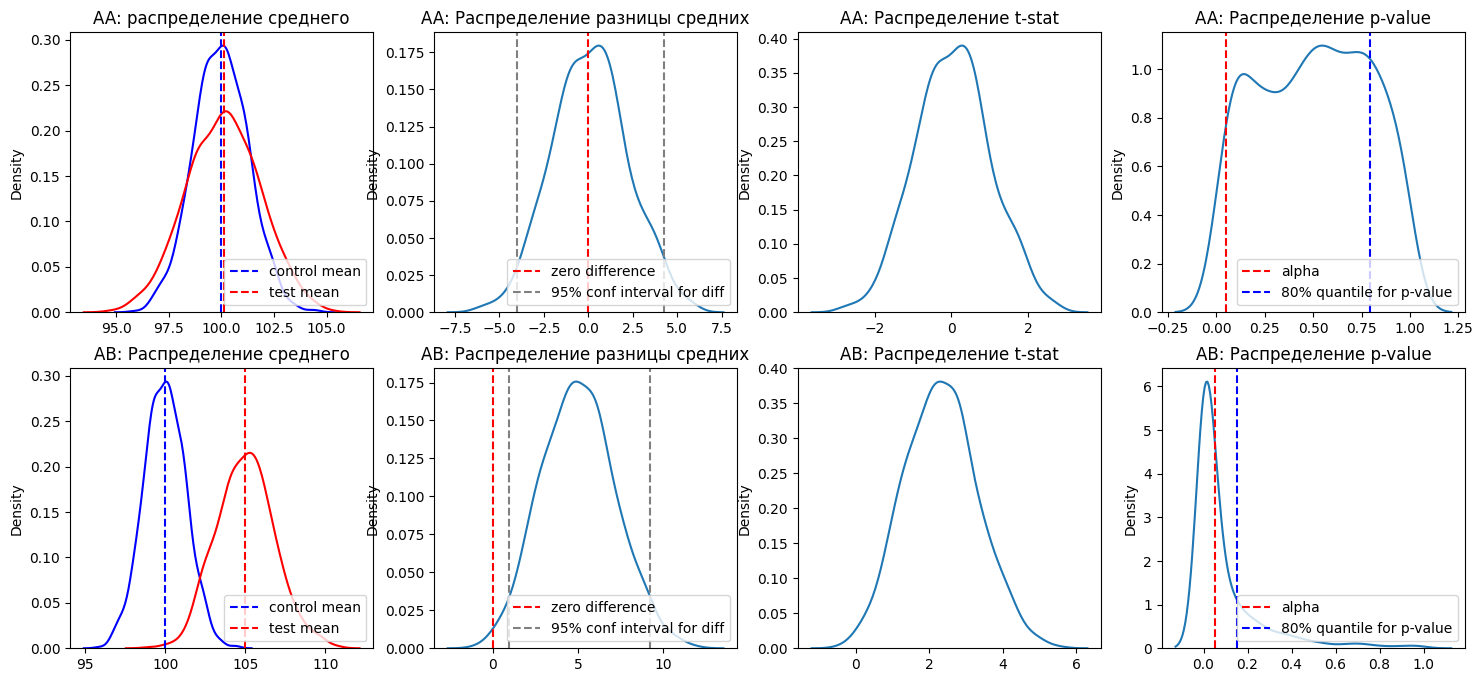

In [ ]:
# определим дизайн теста
alpha, beta, std_1, std_2, mean, rel_lift = 0.05, 0.2, 50, 70, 100, 0.05
power, abs_lift, n_iter = 1-beta, mean*rel_lift, 1000
effect_size = abs_lift / std_1

# находим размер выборки
sample_size = int(tt_ind_solve_power(effect_size=effect_size, alpha=alpha, power=power, nobs1=None, ratio=1))
print(f"Абсолютный размер ожидаемого эффекта = {abs_lift}, cohen's d = {effect_size}, минимальный размер каждой выборки для детекции эффекта = {sample_size}, кол-во симуляций = {n_iter}")

# создаем пустые листы, которые будут заполняться нужными значениями по мере работы цикла
aa_control_group_means, aa_test_group_means = [], []
ab_control_group_means, ab_test_group_means = [], []

aa_p_val_list, aa_t_stat_list, aa_means_diffs_list = [], [], []
ab_p_val_list, ab_t_stat_list, ab_means_diffs_list = [], [], []

for i in range(n_iter):
    sample_1 = np.random.normal(mean, std_1, sample_size)
    sample_2_zero_effect = np.random.normal(mean*(1+0), std_2, sample_size)
    sample_2_with_effect = np.random.normal(mean*(1+rel_lift), std_2, sample_size)

    aa_control_group_means.append(sample_1.mean())
    aa_test_group_means.append(sample_2_zero_effect.mean())

    ab_control_group_means.append(sample_1.mean())
    ab_test_group_means.append(sample_2_with_effect.mean())

    aa_means_diff = sample_2_zero_effect.mean() - sample_1.mean()
    ab_means_diff = sample_2_with_effect.mean() - sample_1.mean()

    aa_t_stat, aa_p_val = ttest_ind(sample_2_zero_effect, sample_1, equal_var=True)
    ab_t_stat, ab_p_val = ttest_ind(sample_2_with_effect, sample_1, equal_var=True)

    aa_p_val_list.append(aa_p_val)
    ab_p_val_list.append(ab_p_val)

    aa_t_stat_list.append(aa_t_stat)
    ab_t_stat_list.append(ab_t_stat)

    aa_means_diffs_list.append(aa_means_diff)
    ab_means_diffs_list.append(ab_means_diff)

experiment_simulation_plot(alpha = 0.05,
                           aa_control_group_means = aa_control_group_means,
                           aa_test_group_means = aa_test_group_means,
                           aa_means_diffs_list = aa_means_diffs_list,
                           aa_stat_list = aa_t_stat_list,
                           aa_p_val_list = aa_p_val_list,
                           ab_control_group_means = ab_control_group_means,
                           ab_test_group_means = ab_test_group_means,
                           ab_means_diffs_list = ab_means_diffs_list,
                           ab_stat_list = ab_t_stat_list,
                           ab_p_val_list = ab_p_val_list)

### критерий Уэлча

Абсолютный размер ожидаемого эффекта = 5.0, cohen's d = 0.1, минимальный размер каждой выборки для детекции эффекта = 1570, кол-во симуляций = 1000

Медиана эффекта для AA симуляции = -0.03, 	Alpha (FPR) = 0.05, 	Alpha 95% CI: (0.03, 0.06)
Медиана эффекта для AB симуляции = 5.08, 	Power (TPR) = 0.65, 	Power 95% CI: (0.62, 0.68)



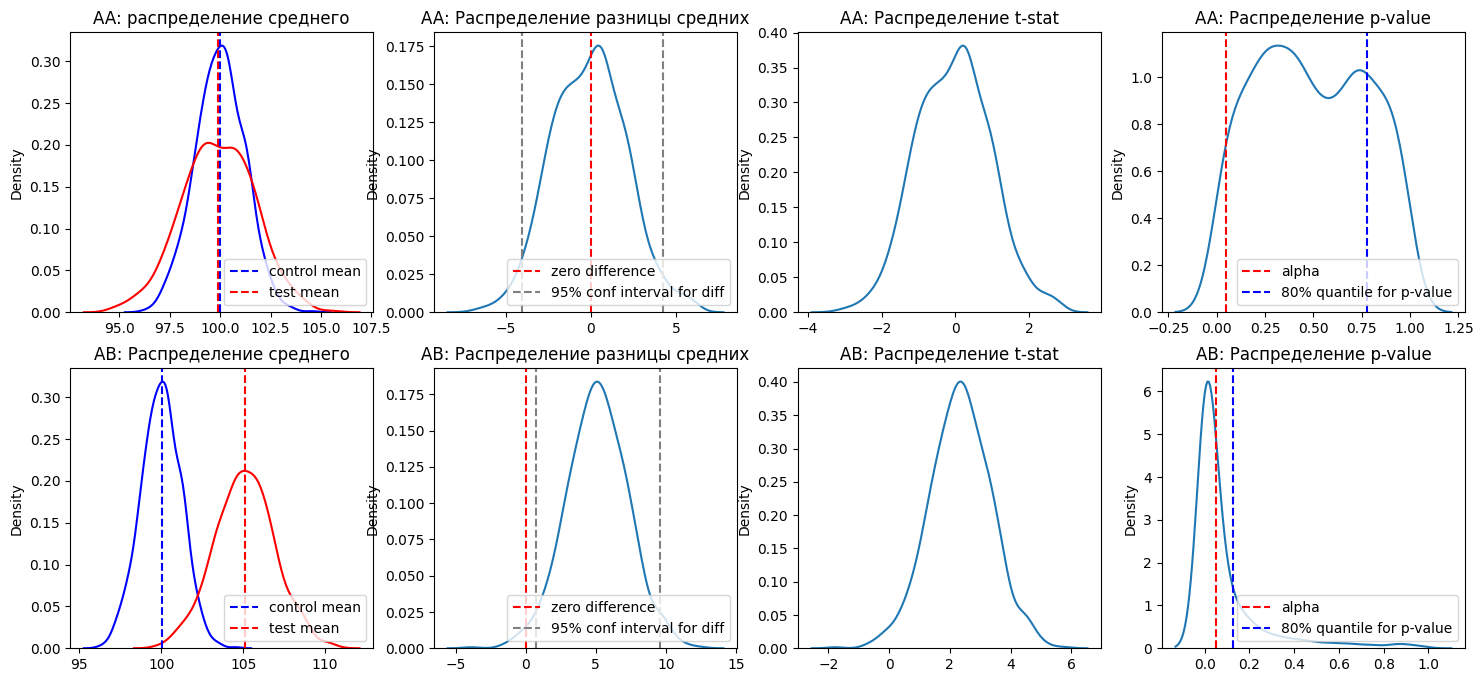

In [ ]:
# определим дизайн теста
alpha, beta, std_1, std_2, mean, rel_lift = 0.05, 0.2, 50, 70, 100, 0.05
power, abs_lift, n_iter = 1-beta, mean*rel_lift, 1000
effect_size = abs_lift / std_1

# находим размер выборки
sample_size = int(tt_ind_solve_power(effect_size=effect_size, alpha=alpha, power=power, nobs1=None, ratio=1))
print(f"Абсолютный размер ожидаемого эффекта = {abs_lift}, cohen's d = {effect_size}, минимальный размер каждой выборки для детекции эффекта = {sample_size}, кол-во симуляций = {n_iter}")

# создаем пустые листы, которые будут заполняться нужными значениями по мере работы цикла
aa_control_group_means, aa_test_group_means = [], []
ab_control_group_means, ab_test_group_means = [], []

aa_p_val_list, aa_t_stat_list, aa_means_diffs_list = [], [], []
ab_p_val_list, ab_t_stat_list, ab_means_diffs_list = [], [], []

for i in range(n_iter):
    sample_1 = np.random.normal(mean, std_1, sample_size)
    sample_2_zero_effect = np.random.normal(mean*(1+0), std_2, sample_size)
    sample_2_with_effect = np.random.normal(mean*(1+rel_lift), std_2, sample_size)

    aa_control_group_means.append(sample_1.mean())
    aa_test_group_means.append(sample_2_zero_effect.mean())

    ab_control_group_means.append(sample_1.mean())
    ab_test_group_means.append(sample_2_with_effect.mean())

    aa_means_diff = sample_2_zero_effect.mean() - sample_1.mean()
    ab_means_diff = sample_2_with_effect.mean() - sample_1.mean()

    aa_t_stat, aa_p_val = ttest_ind(sample_2_zero_effect, sample_1, equal_var=False)
    ab_t_stat, ab_p_val = ttest_ind(sample_2_with_effect, sample_1, equal_var=False)

    aa_p_val_list.append(aa_p_val)
    ab_p_val_list.append(ab_p_val)

    aa_t_stat_list.append(aa_t_stat)
    ab_t_stat_list.append(ab_t_stat)

    aa_means_diffs_list.append(aa_means_diff)
    ab_means_diffs_list.append(ab_means_diff)

experiment_simulation_plot(alpha = 0.05,
                           aa_control_group_means = aa_control_group_means,
                           aa_test_group_means = aa_test_group_means,
                           aa_means_diffs_list = aa_means_diffs_list,
                           aa_stat_list = aa_t_stat_list,
                           aa_p_val_list = aa_p_val_list,
                           ab_control_group_means = ab_control_group_means,
                           ab_test_group_means = ab_test_group_means,
                           ab_means_diffs_list = ab_means_diffs_list,
                           ab_stat_list = ab_t_stat_list,
                           ab_p_val_list = ab_p_val_list)

**Вывод:** Как мы видим, мощность сильно не меняется при использовании критерия Уэлча. На самом деле проблема в том, что мы использовали формулу для расчета размера выборок, предполагающих одинаковую дисперсию. Для получения достаточной мощности нам на этапе продумывания дизайна нужно было бы понимать, что стандартные отклонения в выборках будут разные и поэтому размер эффекта посчитался бы в меньшую сторону. И для его проверки нам понадобилась бы большая выборка.

Здесь хорошим правилом будет проводить установочные исследования, где будет проведена оценка параметров распределения в выборке 1 и в выборке 2

### тест Манна-Уитни

Абсолютный размер ожидаемого эффекта = 5.0, cohen's d = 0.1, минимальный размер каждой выборки для детекции эффекта = 1570, кол-во симуляций = 1000

Медиана эффекта для AA симуляции = 0.05, 	Alpha (FPR) = 0.06, 	Alpha 95% CI: (0.05, 0.08)
Медиана эффекта для AB симуляции = 4.99, 	Power (TPR) = 0.60, 	Power 95% CI: (0.57, 0.63)



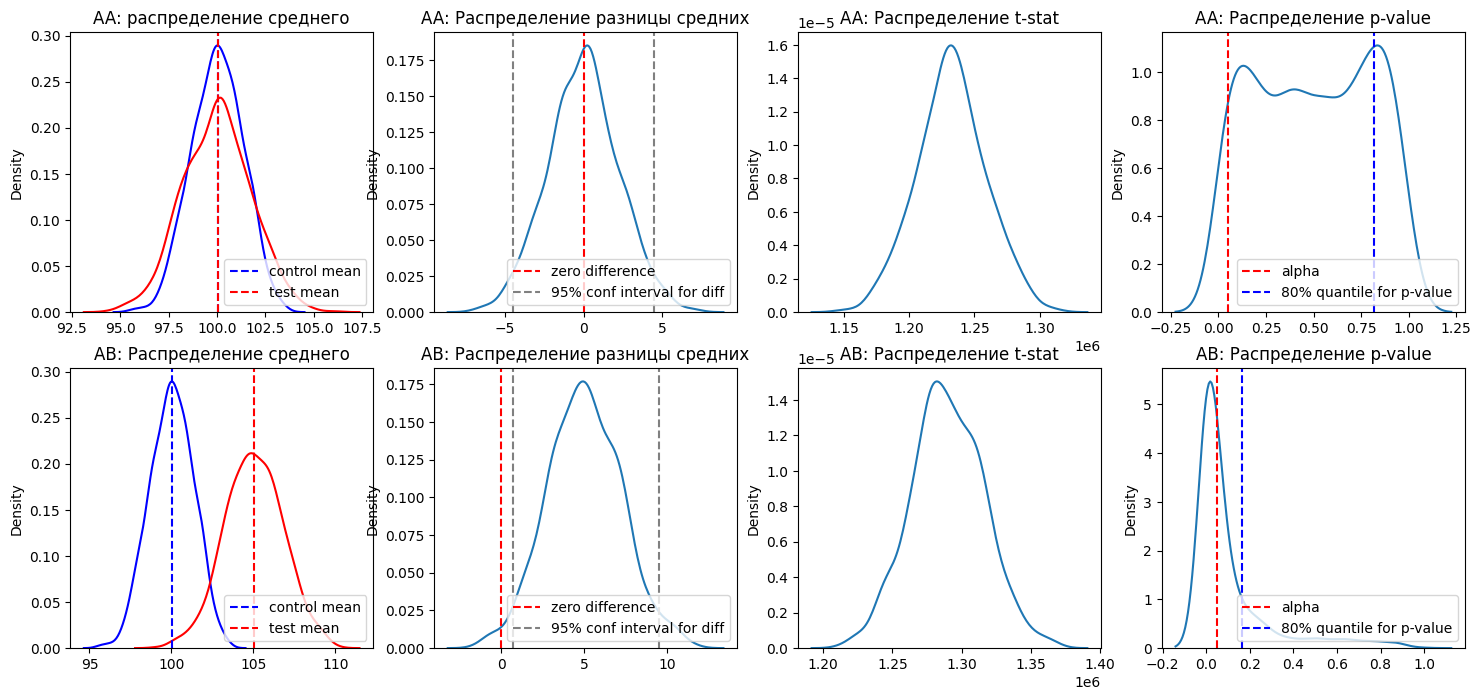

In [ ]:
# определим дизайн теста
alpha, beta, std_1, std_2, mean, rel_lift = 0.05, 0.2, 50, 70, 100, 0.05
power, abs_lift, n_iter = 1-beta, mean*rel_lift, 1000
effect_size = abs_lift / std_1

# находим размер выборки
sample_size = int(tt_ind_solve_power(effect_size=effect_size, alpha=alpha, power=power, nobs1=None, ratio=1))
print(f"Абсолютный размер ожидаемого эффекта = {abs_lift}, cohen's d = {effect_size}, минимальный размер каждой выборки для детекции эффекта = {sample_size}, кол-во симуляций = {n_iter}")

# создаем пустые листы, которые будут заполняться нужными значениями по мере работы цикла
aa_control_group_means, aa_test_group_means = [], []
ab_control_group_means, ab_test_group_means = [], []

aa_p_val_list, aa_u_stat_list, aa_means_diffs_list = [], [], []
ab_p_val_list, ab_u_stat_list, ab_means_diffs_list = [], [], []

for i in range(n_iter):
    sample_1 = np.random.normal(mean, std_1, sample_size)
    sample_2_zero_effect = np.random.normal(mean*(1+0), std_2, sample_size)
    sample_2_with_effect = np.random.normal(mean*(1+rel_lift), std_2, sample_size)

    aa_control_group_means.append(sample_1.mean())
    aa_test_group_means.append(sample_2_zero_effect.mean())

    ab_control_group_means.append(sample_1.mean())
    ab_test_group_means.append(sample_2_with_effect.mean())

    aa_means_diff = sample_2_zero_effect.mean() - sample_1.mean()
    ab_means_diff = sample_2_with_effect.mean() - sample_1.mean()

    aa_u_stat, aa_p_val = mannwhitneyu(sample_2_zero_effect, sample_1)
    ab_u_stat, ab_p_val = mannwhitneyu(sample_2_with_effect, sample_1)

    aa_p_val_list.append(aa_p_val)
    ab_p_val_list.append(ab_p_val)

    aa_u_stat_list.append(aa_u_stat)
    ab_u_stat_list.append(ab_u_stat)

    aa_means_diffs_list.append(aa_means_diff)
    ab_means_diffs_list.append(ab_means_diff)

experiment_simulation_plot(alpha = 0.05,
                           aa_control_group_means = aa_control_group_means,
                           aa_test_group_means = aa_test_group_means,
                           aa_means_diffs_list = aa_means_diffs_list,
                           aa_stat_list = aa_u_stat_list,
                           aa_p_val_list = aa_p_val_list,
                           ab_control_group_means = ab_control_group_means,
                           ab_test_group_means = ab_test_group_means,
                           ab_means_diffs_list = ab_means_diffs_list,
                           ab_stat_list = ab_u_stat_list,
                           ab_p_val_list = ab_p_val_list)

Как мы видим, мощность сильно не меняется.

### Перестановочный тест


Медиана эффекта для AA симуляции = -0.11, 	Alpha (FPR) = 0.04, 	Alpha 95% CI: (0.03, 0.05)
Медиана эффекта для AB симуляции = 5.02, 	Power (TPR) = 0.64, 	Power 95% CI: (0.61, 0.67)



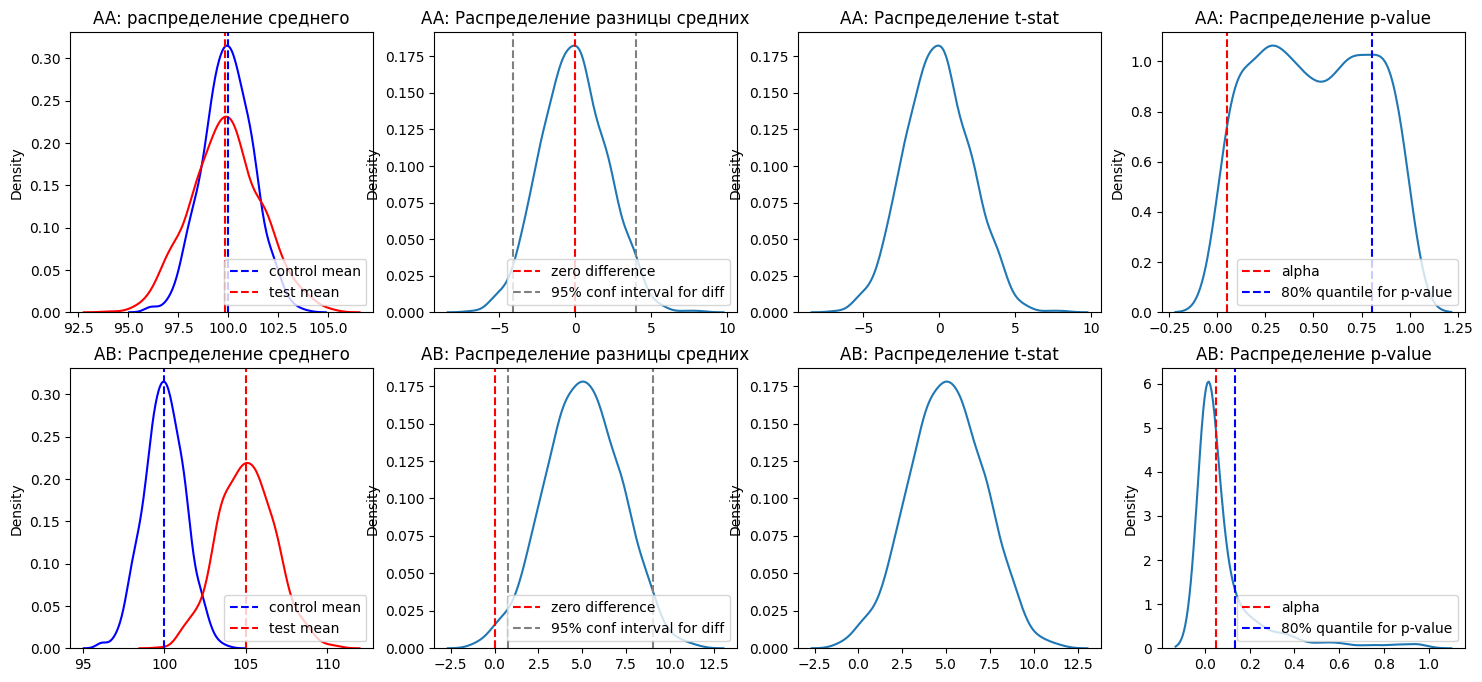

In [4]:
# определим дизайн теста
alpha, beta, std_1, std_2, mean, rel_lift = 0.05, 0.2, 50, 70, 100, 0.05
power, abs_lift, n_iter = 1-beta, mean*rel_lift, 1000
effect_size = abs_lift / std_1

# находим размер выборки
sample_size = int(tt_ind_solve_power(effect_size=effect_size, alpha=alpha, power=power, nobs1=None, ratio=1))
print(f"Абсолютный размер ожидаемого эффекта = {abs_lift}, cohen's d = {effect_size}, минимальный размер каждой выборки для детекции эффекта = {sample_size}, кол-во симуляций = {n_iter}")

# создаем пустые листы, которые будут заполняться нужными значениями по мере работы цикла
aa_control_group_means, aa_test_group_means = [], []
ab_control_group_means, ab_test_group_means = [], []

aa_p_val_list, aa_p_stat_list, aa_means_diffs_list = [], [], []
ab_p_val_list, ab_p_stat_list, ab_means_diffs_list = [], [], []

for i in range(n_iter):
    sample_1 = np.random.normal(mean, std_1, sample_size)
    sample_2_zero_effect = np.random.normal(mean*(1+0), std_2, sample_size)
    sample_2_with_effect = np.random.normal(mean*(1+rel_lift), std_2, sample_size)

    aa_control_group_means.append(sample_1.mean())
    aa_test_group_means.append(sample_2_zero_effect.mean())

    ab_control_group_means.append(sample_1.mean())
    ab_test_group_means.append(sample_2_with_effect.mean())

    aa_means_diff = sample_2_zero_effect.mean() - sample_1.mean()
    ab_means_diff = sample_2_with_effect.mean() - sample_1.mean()

    aa_res = permutation_test((sample_2_zero_effect, sample_1), statistic=lambda x, y: np.mean(x) - np.mean(y), permutation_type='independent', alternative='two-sided')
    aa_p_stat, aa_p_val = aa_res.statistic, aa_res.pvalue
    ab_res = permutation_test((sample_2_with_effect, sample_1), statistic=lambda x, y: np.mean(x) - np.mean(y), permutation_type='independent', alternative='two-sided')
    ab_p_stat, ab_p_val = ab_res.statistic, ab_res.pvalue

    aa_p_val_list.append(aa_p_val)
    ab_p_val_list.append(ab_p_val)

    aa_p_stat_list.append(aa_p_stat)
    ab_p_stat_list.append(ab_p_stat)

    aa_means_diffs_list.append(aa_means_diff)
    ab_means_diffs_list.append(ab_means_diff)

experiment_simulation_plot(alpha = 0.05,
                           aa_control_group_means = aa_control_group_means,
                           aa_test_group_means = aa_test_group_means,
                           aa_means_diffs_list = aa_means_diffs_list,
                           aa_stat_list = aa_p_stat_list,
                           aa_p_val_list = aa_p_val_list,
                           ab_control_group_means = ab_control_group_means,
                           ab_test_group_means = ab_test_group_means,
                           ab_means_diffs_list = ab_means_diffs_list,
                           ab_stat_list = ab_p_stat_list,
                           ab_p_val_list = ab_p_val_list)

**Вывод:** Чуда также не произошло - мощности не удалось добиться даже с этим чудо-тестом, хотя он работал очень долго. Все это подтверждает факт того, насколько важен размер выборки

## Сравнение медианы (median-test)

Абсолютный размер ожидаемого эффекта = 5.0, cohen's d = 0.1, минимальный размер каждой выборки для детекции эффекта = 1570, кол-во симуляций = 1000

Медиана эффекта для AA симуляции = 0.08, 	Alpha (FPR) = 0.05, 	Alpha 95% CI: (0.03, 0.06)
Медиана эффекта для AB симуляции = 5.12, 	Power (TPR) = 0.63, 	Power 95% CI: (0.60, 0.66)



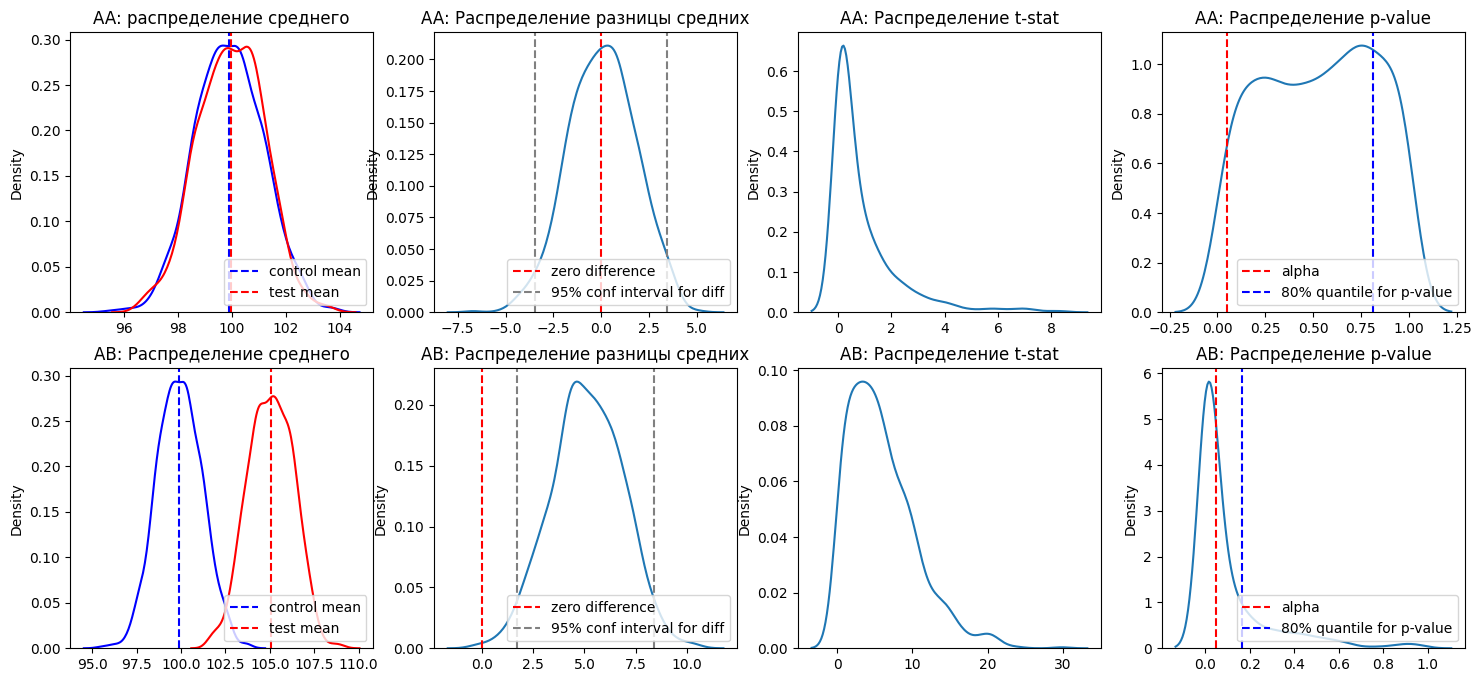

In [ ]:
# определим дизайн теста
alpha, beta, std, mean, rel_lift = 0.05, 0.2, 50, 100, 0.05
power, abs_lift, n_iter = 1-beta, mean*rel_lift, 1000
effect_size = abs_lift / std

# находим размер выборки
sample_size = int(tt_ind_solve_power(effect_size=effect_size, alpha=alpha, power=power, nobs1=None, ratio=1))
print(f"Абсолютный размер ожидаемого эффекта = {abs_lift}, cohen's d = {effect_size}, минимальный размер каждой выборки для детекции эффекта = {sample_size}, кол-во симуляций = {n_iter}")

# создаем пустые листы, которые будут заполняться нужными значениями по мере работы цикла
aa_control_group_means, aa_test_group_means = [], []
ab_control_group_means, ab_test_group_means = [], []

aa_p_val_list, aa_m_stat_list, aa_means_diffs_list = [], [], []
ab_p_val_list, ab_m_stat_list, ab_means_diffs_list = [], [], []

for i in range(n_iter):
    sample_1 = np.random.normal(mean, std, sample_size)
    sample_2_zero_effect = np.random.normal(mean*(1+0), std, sample_size)
    sample_2_with_effect = np.random.normal(mean*(1+rel_lift), std, sample_size)

    aa_control_group_means.append(sample_1.mean())
    aa_test_group_means.append(sample_2_zero_effect.mean())

    ab_control_group_means.append(sample_1.mean())
    ab_test_group_means.append(sample_2_with_effect.mean())

    aa_means_diff = sample_2_zero_effect.mean() - sample_1.mean()
    ab_means_diff = sample_2_with_effect.mean() - sample_1.mean()

    aa_m_stat = median_test(sample_2_zero_effect, sample_1, correction = True)[0] # медманный тест проверяющий гипотезу о равенствое медиан
    aa_p_val = median_test(sample_2_zero_effect, sample_1, correction = True)[1]

    ab_m_stat = median_test(sample_2_with_effect, sample_1, correction = True)[0]
    ab_p_val = median_test(sample_2_with_effect, sample_1, correction = True)[1]

    aa_p_val_list.append(aa_p_val)
    ab_p_val_list.append(ab_p_val)

    aa_m_stat_list.append(aa_m_stat)
    ab_m_stat_list.append(ab_m_stat)

    aa_means_diffs_list.append(aa_means_diff)
    ab_means_diffs_list.append(ab_means_diff)

experiment_simulation_plot(alpha = 0.05,
                           aa_control_group_means = aa_control_group_means,
                           aa_test_group_means = aa_test_group_means,
                           aa_means_diffs_list = aa_means_diffs_list,
                           aa_stat_list = aa_m_stat_list,
                           aa_p_val_list = aa_p_val_list,
                           ab_control_group_means = ab_control_group_means,
                           ab_test_group_means = ab_test_group_means,
                           ab_means_diffs_list = ab_means_diffs_list,
                           ab_stat_list = ab_m_stat_list,
                           ab_p_val_list = ab_p_val_list)

**Вывод:** Как мы видим у Moods median test уровень мощности ниже чем у t-test и Манна-Уитни. Но в целом, если хотите проверить гипотезу именно о равенстве медиан, его вполне можно использовать. Но понадобятся большие выборки. Выборки для этого теста аналитически рассчитать не получится, но можно сделать это численно через симуляции так, как мы это делали в примере с ARPU.

# Выводы по симуляциям

- При выборе критерия нужно учитывать гипотезу (какой параметр оцениваем), и характер данных - распределение, выбросы, пропуски
- Для нормально распределенных данных с одинаковой дрсперсией t-тест и Манна-Уитни справляются одинаково хорошо
- Для нормально распределенных данных с одинаковой дрсперсией, но при этом с выбросами, у t-теста возрастает ошибка I рода. Это касается случаев, когда на этапе дизайна эксперимента выбросы не были учтены в дисперсии. При этом, если выбросы сонаправлены с измеряемым эффектом, мощность теста увеличивается. Тест Манна-Уитни красавчик - он устойчив к появлению выбросов
- Для экспоненциального распределения t-тест справляется достойно, но требует большего числа наблюдений. А вот при использовании критерия Манна-Уитни мощность пострадала
- При использовании критерия Манна-Уитни нужно быть осторожными с проверяемой гипотезой. Может оказаться так, что тест детектирует изменение распределения при отсутствии изменения среднего значения метрики. Поскольку для бизнеса как правило важны средние значения, выраженные в деньгах или натуральных величинах, решения на основе таких тестов могут быть ошибочными
- Самая неприятная штука возникает при изменении дисперсии - в этом случае страдает прежде всего мощность теста не зависимо от критерия. Даже тест Уэлча не решает эту проблему.
- Желательно проверять свои критерии через симуляции на реально существующих данных на этапе планирования и дизайна эксперимента

# Практика на реальных данных

**СПЕЦИФИКАЦИЯ ЗАДАЧИ**

**Задача:** проверить, повлияло ли повышение цены на 10% на увеличение средней месячной выручки от платящих пользователей (ARPPU) на 5%.

**Бизнес-предпосылки:** Команда монетизации автоклассифайда раскатила новую ценовую политику на продавцов (листеров) в Новосибирске: повысили цены для всех на 10%. Основная гипотеза была в том, что месячный ARPPU увеличится на 5%. Нововведение раскатили через АB-тест, но период теста был ограничен -  всего один месяц, поэтому размер выборки в тесте тоже оказался ограничен.

Также менеждер хочет найти дополнительные инсайты в реакции пользователей на новую ценовую политику.

**Проблема:** поскольку эксперимент проводился без предварительной подготовки (дизайна) нет гарантий, что имеющихся данных будет достаточно для получения статистически значимых выводов. Тем не менее нужно посмотреть, какие выводы на основе каких критериев мы сможем сделать

**Описание данных:** мы имеем 32 тыс. наблюдений, размеченных по принадлежности к группам (0 - контрольная со старыми ценами, 1 - тестовая, с новыми ценами), равномерно распределенными по группам. Поле ravenue - это сумма выручки от пользователя за месяц наблюдения.

**План действий:**
1. Рассчитаем необходимый размер выборок для проверки гипотезы с помощью t-критерия (tt_ind_solve_power) и критерия Манна-Уитни (с помощью симуляции)
2. Рассчитаем размер выборок для детекции эффекта в том размере, который наблюдается по результатам эксперимента - т.е. для подтверждения его статистической значимости. Этот шаг нужен просто для полноты картины, он не отвечает поставленной задаче
3. Рассчитаем размер эффекта, который можем получить по тому размеру выборок, который мы имеем.
4. Проведем тесты и интерпретируем результат.

In [5]:
data = pd.read_csv('novosib_arppu.csv')
data

passport_id       region  revenue  group
0        135342321  Новосибирск      320      0
1        142791180  Новосибирск     2173      1
2        123514803  Новосибирск      215      0
3        124568474  Новосибирск     1720      0
4        141887661  Новосибирск      645      0
...            ...          ...      ...    ...
32110    140696283  Новосибирск     1935      0
32111    142986548  Новосибирск      297      1
32112    124649967  Новосибирск      470      0
32113    133838295  Новосибирск     3796      1
32114    138637090  Новосибирск     1935      0

[32115 rows x 4 columns]

In [123]:
data.groupby('group', as_index=False).agg(num_customers = ('passport_id','count'), ARPPU_mean = ('revenue', 'mean'), ARPPU_median = ('revenue','median'), ARPPU_std = ('revenue','std'))

group  num_customers   ARPPU_mean  ARPPU_median    ARPPU_std
0      0          15994  1534.557084         516.0  7817.340343
1      1          16121  1587.757459         454.0  7557.621609

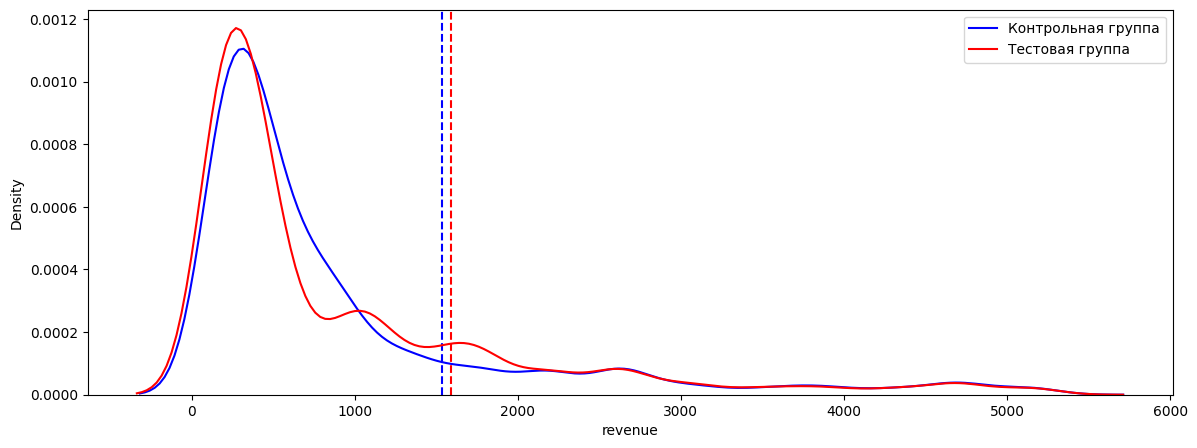

In [64]:
plt.figure(figsize = (14, 5))
sns.kdeplot(data[(data['revenue']<data['revenue'].quantile(0.95))&(data['group']==0)].revenue, color = 'blue', label="Контрольная группа")
plt.axvline(data.query('group==0').revenue.mean(), color = 'blue', linestyle ='--')
sns.kdeplot(data[(data['revenue']<data['revenue'].quantile(0.95))&(data['group']==1)].revenue, color = 'red', label="Тестовая группа")
plt.axvline(data.query('group==1').revenue.mean(), color = 'red', linestyle ='--')
plt.legend();

Видим, что данные имеют логнормальное распределение с сильно удлененным хвостом

## Размер выборок для детекции увеличения выручки на 5%

### t-тест

In [68]:
alpha, beta, std, mean, lift = 0.05, 0.2, data.query('group==0').revenue.std(), data.query('group==0').revenue.mean(), 0.05
power, effect_size = 1 - beta, mean * lift / std #cohens'd

# найдем размер выборки
sample_size = ceil(tt_ind_solve_power(effect_size=effect_size, alpha=alpha, power=power, nobs1=None, ratio=1))

print(f"ARPPU тестовая группа = {data.query('group==0').revenue.mean():.2f}, \tARPPU контрольная группа = {mean:.2f}, \tАбсолютный размер эффекта = {data.query('group==0').revenue.mean()*0.05:.2f}"+\
      f"\t\tОтносительное увеличение = {0.05:.2%}")
print(f"Стандартное отклонение = {std:.2f}, \tcohen's d = {effect_size:.2f}, \t\t\tМинимальный размер каждой выборки = {sample_size}")

ARPPU тестовая группа = 1534.56, 	ARPPU контрольная группа = 1534.56, 	Абсолютный размер эффекта = 76.73		Относительное увеличение = 5.00%
Стандартное отклонение = 7817.34, 	cohen's d = 0.01, 			Минимальный размер каждой выборки = 162949


### критерий Манна-Уитни

Проведем симуляцию, в которой для каждого размера выборки от 500 до 5000 с шагом в 100 сэмплируем выборки из контрольной группы по аналогии с тем, как делали в симуляции на синтетике: контроль, тест, и псевдо-тест, и проведем 2 теста - на детекцию изменений в контрольной и псевдо-тестовой групп, и в контрольной и тестовой (это контрольная группа с добавленным эффектом в размере 5%). Кол-во итераций для каждого размера возьмем 200.

Размер выборки, который мы ищем, будет соответствовать первому значению мощности, равной или больше 0.8

In [35]:
# Функция для симуляции
def simulate_mw_aab_test(lift, start_size, end_size, step_size, n_sim):
  sample_size_list = np.arange(start_size, end_size, step_size)
  mw_alphas_list, mw_power_list, mw_lower_power_ci_list, mw_upper_power_ci_list = [], [], [], []

  # Для каждого возможного размера выборки из диапазона с шагом 100 проведем n_sim симуляций эксперимента
  for sample_size in sample_size_list:

    # Создаем списки для каждого размера выборки
    aa_means_diff_list, ab_means_diff_list, aa_p_val_list, ab_p_val_list = [], [], [], []
    for _ in range(n_sim):
      # получаем 3 случайные выборки, к одной из них добавляем эффект
      sample_control =  data.query('group==0').sample(sample_size, replace=True).revenue
      sample_treatment_0 = data.query('group==0').sample(sample_size, replace=True).revenue
      sample_treatment_1 = data.query('group==0').sample(sample_size, replace=True).revenue*(1+lift)

      # рассчитываем нужные разницу в средних значениях и p_value
      aa_means_diff = sample_treatment_0.mean() - sample_control.mean()
      ab_means_diff = sample_treatment_1.mean() - sample_control.mean()

      # p_value показывает, принадлежат выборки одному распределению или разным
      _, aa_p_val = mannwhitneyu(sample_treatment_0, sample_control)
      _, ab_p_val = mannwhitneyu(sample_treatment_1, sample_control)

      # добавляем метрики в списки
      aa_means_diff_list.append(aa_means_diff)
      ab_means_diff_list.append(ab_means_diff)
      aa_p_val_list.append(aa_p_val)
      ab_p_val_list.append(ab_p_val)

    alpha = np.sum(np.array(aa_p_val_list) < 0.05) / n_sim
    power = np.sum(np.array(ab_p_val_list) < 0.05) / n_sim

    alpha_ci = proportion_confint(np.sum(np.array(aa_p_val_list) < 0.05), n_sim, alpha=0.05)
    power_ci = proportion_confint(np.sum(np.array(ab_p_val_list) < 0.05), n_sim, alpha=0.05)

    mw_alphas_list.append(alpha)
    mw_power_list.append(power)
    mw_lower_power_ci_list.append(power_ci[0])
    mw_upper_power_ci_list.append(power_ci[1])

  return sample_size_list, mw_alphas_list, mw_power_list, mw_lower_power_ci_list, mw_upper_power_ci_list

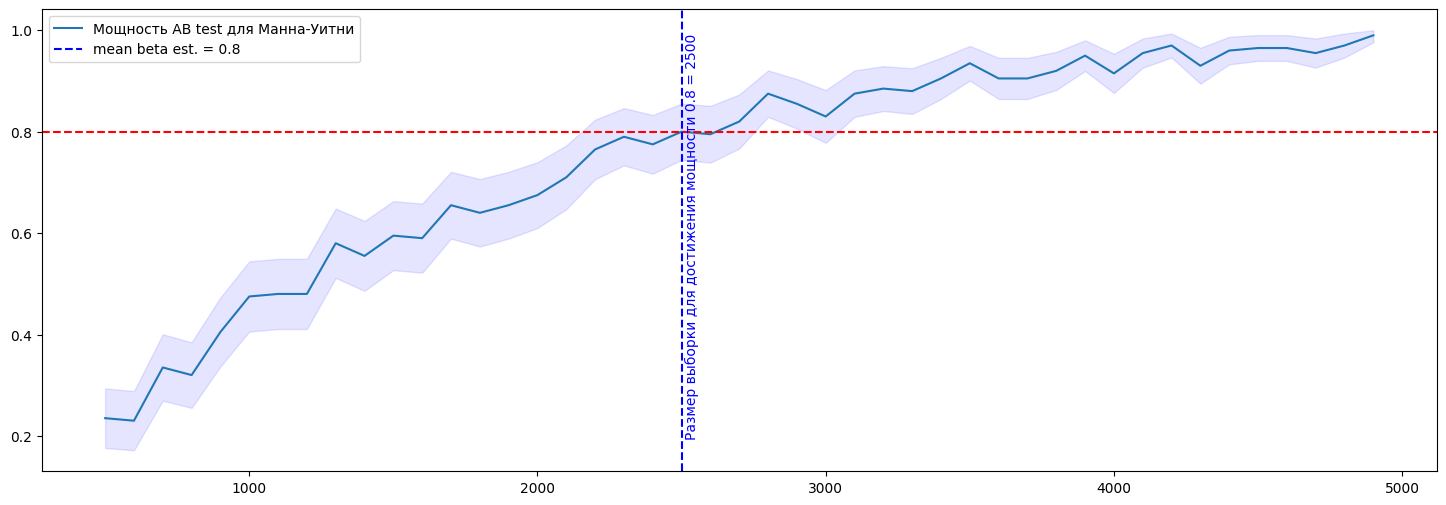

In [41]:
np.random.seed(1)
sample_size_list, mw_alphas_list, mw_power_list, mw_lower_power_ci_list, mw_upper_power_ci_list = simulate_mw_aab_test(lift=0.05, start_size=500, end_size=5000, step_size=100, n_sim=200)
# Отрисуем результаты симуляции, полученные на прошлом этапе. Посмотрим рост мощности теста.
mw_power_est_index = np.argmax(np.array(mw_power_list) >= 0.8)
plt.figure(figsize=(18,6))
sns.lineplot(x = sample_size_list, y = mw_power_list, label = 'Мощность AB test для Манна-Уитни')
plt.fill_between(sample_size_list, mw_lower_power_ci_list, mw_upper_power_ci_list, color='blue', alpha=0.1) # отрисовываем ДИ
plt.axhline(0.8, color = 'red', linestyle ='--')
plt.axvline(sample_size_list[mw_power_est_index], color = 'blue', linestyle ='--', label = 'mean beta est. = 0.8')
plt.text(sample_size_list[mw_power_est_index] + 10, 0.2, f'Размер выборки для достижения мощности 0.8 = {sample_size_list[mw_power_est_index]}', rotation = 'vertical', color = 'blue')
plt.legend();

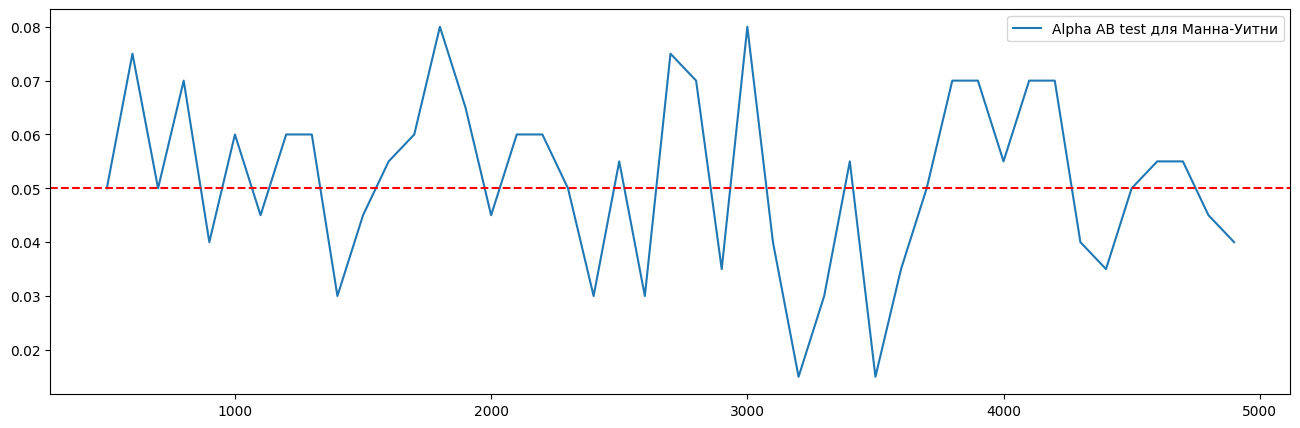

In [44]:
# посмотрим поведение ошибки alpha
plt.figure(figsize=(16,5))
sns.lineplot(x = sample_size_list, y = mw_alphas_list, label = 'Alpha AB test для Манна-Уитни')
plt.axhline(0.05, color = 'red', linestyle ='--')
plt.legend();

Для t-критерия нужно 167 тыс. наблюдений в каждой выборке, а для Манна-Уитни - 2,5 тыс. Разница очень существенная

## Размер выборок для детекции имеющегося отличия

рассчитаем с помощью t-теста

Для детекции увеличения выручки на 3,5% при использовании t-теста нужны выборки размером около 340 тыс. пользователей

In [71]:
effect_size = (data.query('group==1').revenue.mean()-data.query('group==0').revenue.mean())/data.query('group==0').revenue.std()

sample_size = ceil(tt_ind_solve_power(effect_size = effect_size, alpha = 0.05, power = 0.8, nobs1 = None, ratio = 1))

print(f"ARPPU тестовая группа = {data.query('group==0').revenue.mean():.2f}, \tARPPU контрольная группа = {mean:.2f}, \tАбсолютный размер эффекта = {data.query('group==1').revenue.mean()-data.query('group==0').revenue.mean():.2f}"+\
      f"\t\tОтносительное увеличение = {(data.query('group==1').revenue.mean()-data.query('group==0').revenue.mean())/data.query('group==0').revenue.mean():.2%}")
print(f"Стандартное отклонение = {std:.2f}, \tcohen's d = {effect_size:.2f}, \t\t\tМинимальный размер каждой выборки = {sample_size}")

ARPPU тестовая группа = 1534.56, 	ARPPU контрольная группа = 1534.56, 	Абсолютный размер эффекта = 53.20		Относительное увеличение = 3.47%
Стандартное отклонение = 7817.34, 	cohen's d = 0.01, 			Минимальный размер каждой выборки = 338943


## Размер эффекта по имеющемуся размеру выборок

В качестве размера одной выборки поделим общее кол-во наблюдений на 2

In [78]:
effect_size = tt_ind_solve_power(effect_size=None, alpha=0.05, power=0.8, nobs1=len(data)/2, ratio=1)
abs_MDE = effect_size * std
print(f'Абсолютный MDE, который можем позволить с датасетом имеющегося размера {len(data)/2:.0f} = {abs_MDE:.2f}')

Абсолютный MDE, который можем позволить с датасетом имеющегося размера 16058 = 244.42


## Симуляция MDE
Проверим на исторических данных, сможем ли мы детектировать эффект увеличения выручки в размере 5% если возьмем выборки размера, который рассчитали ранее для t-теста - 162949

Альфа для Манна-Уитни = 0.04, 	Мощность для Манна-Уитни = 1.00, 
Альфа для t-теста = 0.05, 	Мощность для t-теста = 0.79


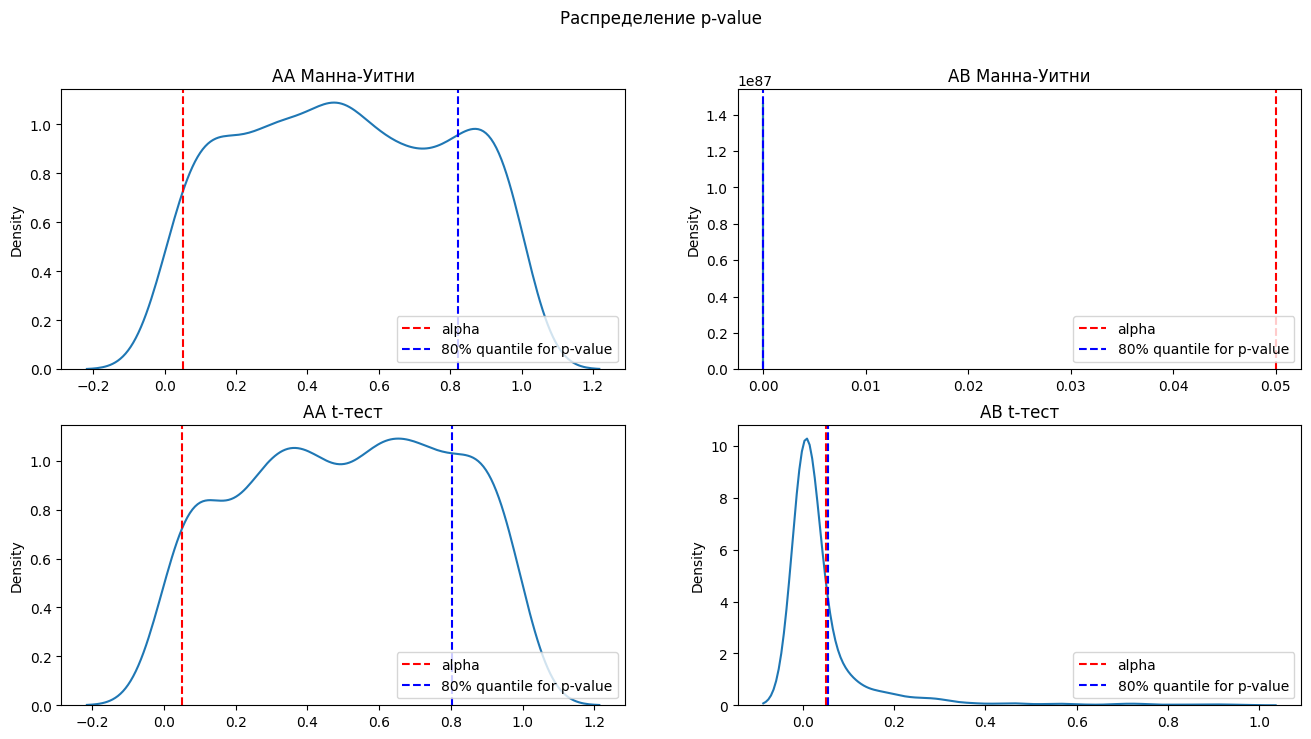

In [95]:
np.random.seed(1)
n_sim, sample_size, alpha  = 1000, 162_949, 0.05
mv_aa_p_val_list, mv_ab_p_val_list, tt_aa_p_val_list, tt_ab_p_val_list = [], [], [], []
odservations_gr0 = data[data['group'] == 0]['revenue']

for n in range(n_sim):
    control = odservations_gr0.sample(sample_size, replace=True)
    expected_no_effect = odservations_gr0.sample(sample_size, replace=True)
    expected = odservations_gr0.sample(sample_size, replace=True) * (1 + 0.05)

    u_stat, mv_aa_p_val = mannwhitneyu(control, expected_no_effect)
    u_stat, mv_ab_p_val = mannwhitneyu(control, expected)

    mv_aa_p_val_list.append(mv_aa_p_val)
    mv_ab_p_val_list.append(mv_ab_p_val)

    t_stat, tt_ab_p_val = ttest_ind(control, expected)
    t_stat, tt_aa_p_val = ttest_ind(control, expected_no_effect)

    tt_aa_p_val_list.append(tt_aa_p_val)
    tt_ab_p_val_list.append(tt_ab_p_val)

alpha_mv = np.sum(np.array(mv_aa_p_val_list) < alpha) / n_sim
beta_mv = np.sum(np.array(mv_ab_p_val_list) < alpha) / n_sim

alpha_tt = np.sum(np.array(tt_aa_p_val_list) < alpha) / n_sim
beta_tt = np.sum(np.array(tt_ab_p_val_list) < alpha) / n_sim

print(f'Альфа для Манна-Уитни = {alpha_mv:.2f}, \tМощность для Манна-Уитни = {beta_mv:.2f}, \nАльфа для t-теста = {alpha_tt:.2f}, \tМощность для t-теста = {beta_tt:.2f}')

fig, axes = plt.subplots(2, 2, figsize=(16, 8))
fig.suptitle('Распределение p-value')

sns.kdeplot(ax=axes[0,0], data = mv_aa_p_val_list)
axes[0,0].set_title('AA Манна-Уитни')
axes[0,0].axvline(x=alpha, linestyle = '--', color = 'red', label = 'alpha')
axes[0,0].axvline(x=np.quantile(mv_aa_p_val_list, 0.8), linestyle = '--', color = 'blue', label = '80% quantile for p-value')
axes[0,0].legend(loc='lower right')

sns.kdeplot(ax=axes[0,1], data = mv_ab_p_val_list)
axes[0,1].set_title('AB Манна-Уитни')
axes[0,1].axvline(x=alpha, linestyle = '--', color = 'red', label = 'alpha')
axes[0,1].axvline(x=np.quantile(mv_ab_p_val_list, 0.8), linestyle = '--', color = 'blue', label = '80% quantile for p-value')
axes[0,1].legend(loc='lower right')

sns.kdeplot(ax=axes[1,0], data = tt_aa_p_val_list)
axes[1,0].set_title('AA t-тест')
axes[1,0].axvline(x=alpha, linestyle = '--', color = 'red', label = 'alpha')
axes[1,0].axvline(x=np.quantile(tt_aa_p_val_list, 0.8), linestyle = '--', color = 'blue', label = '80% quantile for p-value')
axes[1,0].legend(loc='lower right')

sns.kdeplot(ax=axes[1,1], data = tt_ab_p_val_list)
axes[1,1].set_title('AB t-тест')
axes[1,1].axvline(x=alpha, linestyle = '--', color = 'red', label = 'alpha')
axes[1,1].axvline(x=np.quantile(tt_ab_p_val_list, 0.8), linestyle = '--', color = 'blue', label = '80% quantile for p-value')
axes[1,1].legend(loc='lower right');

Полученные параметры позволяют нам использовать и t-тест, и Манна-Уитни. Но, с целью осмотрительности, лучше использовать t-тест, т.к. проверяемая нами гипотеза относится к среднему значению выручки

Несмотря на то, что из-за большой дисперсии требуется большой размер выборок, можно увеличить чувствительность теста с помощью CUPED или других методов

## Проведем тесты



### t-тест

In [107]:
statistic, pvalue = ttest_ind(data.query('group==0').revenue, data.query('group==1').revenue, alternative="two-sided")
print(f't-статистика = {statistic:.2f}, \tp-value = {pvalue:.2f}')

t-статистика = -0.62, 	p-value = 0.54


### критерий Манна-Уитни

In [105]:
statistic, pvalue = mannwhitneyu(data.query('group==0').revenue, data.query('group==1').revenue, alternative="two-sided")
print(f'U-статистика = {statistic:.2f}, \tp-value = {pvalue:.2f}')

U-статистика = 137332553.50, 	p-value = 0.00


### median-test

In [122]:
statistic, pvalue, _, _ = median_test(data.query('group==0').revenue, data.query('group==1').revenue)
print(f"Хи-квадрат Пирсона = {statistic:.2f}, \tp-value = {pvalue:.2f}, \tразница медиан = {data.query('group==1')['revenue'].quantile(0.5)-data.query('group==0')['revenue'].quantile(0.5):.2f}")

Хи-квадрат Пирсона = 108.82, 	p-value = 0.00, 	разница медиан = -62.00


# Вывод

- t-тест не позволил отклонить нулевую гипотезу. Но как мы и установили, для получения статистически значимых выводов на основе t-критерия данных должно быть больше. В данном случае результат может означать как справедливо отвергнутую H0, так и ошибочно отвергнутую вследствие недостатка мощности
- критерий Мана-Уитни статистически значимо подтвердил альтернативную гипотезу, но сама гипотеза о различии распределений, что не позволяет использовать этот результат для принятия решений
- медианный тест на основе критерия хи-квадрат детектировал уменьшение медианы выручки в тестовой группе - то есть этот тест обнаружил эффект, противоположный тому, который мы надеялись обнаружить. Принять с уверенностью этот результат мы не можем, т.к. не проверяли этот критерий на симуляции и не знаем его реальных параметров мощности и значимости. Кроме того медиана не является бизнес-метрикой, используемой для экономической модели

**Что делать дальше**: во-первых попробовать увеличить чувствительность t-теста или провести bootstrap. Если это не поможет получить статистически значимые результаты - рассмотреть возможность повторного проведения эксперимента, но уже с предрассчитанными параметрами